# **Importing Packages**

Make sure to install the packages before importing if needed.

In [125]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import igraph
import leidenalg
import gseapy as gp
import os
import glob
import re

# **Loading Data**

To see requirements for all AnnData objects (CELLxCELL): https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/7.0.0/schema.md.

In [ ]:
## Emplacement pour elodie 
adata = sc.read_h5ad("/Users/elodiehusson/Desktop/AD & PD/77k_AD_PD_CTRL.h5ad")
## Path Yara 
# adata = sc.read_h5ad("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/77k_AD_PD_CTRL.h5ad")

# ajoutez vos emplacements ici du fichier, et juste mettez en commentaires les autres
# adata = sc.read_h5ad(".../.../subset_AD_PD_CTRL.h5ad")

adata_raw = adata.copy()

In [ ]:
adata.var_keys

<bound method AnnData.var_keys of AnnData object with n_obs × n_vars = 77052 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_t

The studied conditions are the following:

In [ ]:
x = adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_16284/385958126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()


## **Reduced Dataset's Metadata**

scanpy shows a structured summary:

In [63]:
adata

AnnData object with n_obs × n_vars = 77052 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'sche

In [64]:
# This is the sparse matrix
print("adata.X type is :",type(adata.X))

print(adata.X[:5, :5])

adata.X type is : <class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 2)	1.0
  (4, 2)	3.0
  (4, 4)	1.0


In [65]:
print(f"The variable adata has the following shape: {adata.shape}.")
print(f"There are {adata.shape[0]} cells and {adata.shape[1]} genes in this dataset.")

The variable adata has the following shape: (77052, 34176).
There are 77052 cells and 34176 genes in this dataset.


In [66]:
donors_per_disease = pd.crosstab(adata.obs["donor_id"],adata.obs["disease"])
donors_per_disease_summary = donors_per_disease.sum()

print("Number of donors per disease status:")
print(donors_per_disease_summary)

Number of donors per disease status:
disease
dementia || Alzheimer disease    31949
dementia || Parkinson disease     7772
normal                           37331
dtype: int64


In [67]:
print("The keys of adata.obs are the following:", adata.obs.keys())

adata.obs.head()

The keys of adata.obs are the following: Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


Source  n_genes  n_counts  class subclass  \
barcodekey                                                                  
Donor_333-1-GTCTGTCGTTCTCCTG-1       R     3117    6236.0  Oligo    Oligo   
Donor_1001-1-ACTTTGTGTTACCGTA-1      R     1026    1444.0  Astro    Astro   
Donor_638-1-ACCCTTGTCCTTTAGT-0       R     3025    6086.0   Endo     Endo   
Donor_865-1-TGTGAGTAGAAAGTCT-0       R     3142    6582.0  Astro    Astro   
Donor_865-1-AGATGCTAGTCTTCCC-0       R     6149   27425.0     IN   IN_SST   

                                      subtype tissue_ontology_term_id  \
barcodekey                                                              
Donor_333-1-GTCTGTCGTTCTCCTG-1   Oligo_OPALIN          UBERON:0009834   
Donor_1001-1-ACTTTGTGTTACCGTA-1    Astro_WIF1          UBERON:0009834   
Donor_638-1-ACCCTTGTCCTTTAGT-0     Endo_IL1R1          UBERON:0009834   
Donor_865-1-TGTGAGTAGAAAGTCT-0   Astro_PLSCR1          UBERON:0009834   
Donor_865-1-AGATGCTAGTCTTCCC-0   IN_SST_EDNRA          UBERON:0009834   

                                tissue_type assay_ontology_term_id  \
barcodekey                                                           
Donor_333-1-GTCTGTCGTTCTCCTG-1       tissue            EFO:0009922   
Donor_1001-1-ACTTTGTGTTACCGTA-1      tissue            EFO:0009922   
Donor_638-1-ACCCTTGTCCTTTAGT-0       tissue            EFO:0009922   
Donor_865-1-TGTGAGTAGAAAGTCT-0       tissue            EFO:0009922   
Donor_865-1-AGATGCTAGTCTTCCC-0       tissue            EFO:0009922   

                                cell_type_ontology_term_id  ...  \
barcodekey                                                  ...   
Donor_333-1-GTCTGTCGTTCTCCTG-1                  CL:0000128  ...   
Donor_1001-1-ACTTTGTGTTACCGTA-1                 CL:0000127  ...   
Donor_638-1-ACCCTTGTCCTTTAGT-0                  CL:0000115  ...   
Donor_865-1-TGTGAGTAGAAAGTCT-0                  CL:0000127  ...   
Donor_865-1-AGATGCTAGTCTTCCC-0                  CL:4023017  ...   

                                genetic_ancestry  \
barcodekey                                         
Donor_333-1-GTCTGTCGTTCTCCTG-1        East Asian   
Donor_1001-1-ACTTTGTGTTACCGTA-1            Asian   
Donor_638-1-ACCCTTGTCCTTTAGT-0        East Asian   
Donor_865-1-TGTGAGTAGAAAGTCT-0        East Asian   
Donor_865-1-AGATGCTAGTCTTCCC-0        East Asian   

                                       disease_ontology_term_id  \
barcodekey                                                        
Donor_333-1-GTCTGTCGTTCTCCTG-1   MONDO:0001627 || MONDO:0004975   
Donor_1001-1-ACTTTGTGTTACCGTA-1  MONDO:0001627 || MONDO:0004975   
Donor_638-1-ACCCTTGTCCTTTAGT-0   MONDO:0001627 || MONDO:0004975   
Donor_865-1-TGTGAGTAGAAAGTCT-0   MONDO:0001627 || MONDO:0004975   
Donor_865-1-AGATGCTAGTCTTCCC-0   MONDO:0001627 || MONDO:0004975   

                                                          cell_type  \
barcodekey                                                            
Donor_333-1-GTCTGTCGTTCTCCTG-1                      oligodendrocyte   
Donor_1001-1-ACTTTGTGTTACCGTA-1                           astrocyte   
Donor_638-1-ACCCTTGTCCTTTAGT-0                     endothelial cell   
Donor_865-1-TGTGAGTAGAAAGTCT-0                            astrocyte   
Donor_865-1-AGATGCTAGTCTTCCC-0   sst GABAergic cortical interneuron   

                                     assay                        disease  \
barcodekey                                                                  
Donor_333-1-GTCTGTCGTTCTCCTG-1   10x 3' v3  dementia || Alzheimer disease   
Donor_1001-1-ACTTTGTGTTACCGTA-1  10x 3' v3  dementia || Alzheimer disease   
Donor_638-1-ACCCTTGTCCTTTAGT-0   10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-TGTGAGTAGAAAGTCT-0   10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-AGATGCTAGTCTTCCC-0   10x 3' v3  dementia || Alzheimer disease   

                                    sex                          tissue  \
barcodekey                                                             

In [68]:
print("Donor Names : \n", adata.obs_names)

print("Gene Names : \n", adata.var_names) # These are Ensembl IDs

Donor Names : 
 Index(['Donor_333-1-GTCTGTCGTTCTCCTG-1', 'Donor_1001-1-ACTTTGTGTTACCGTA-1',
       'Donor_638-1-ACCCTTGTCCTTTAGT-0', 'Donor_865-1-TGTGAGTAGAAAGTCT-0',
       'Donor_865-1-AGATGCTAGTCTTCCC-0', 'Donor_1007-1-GCCCAGATCAAAGACA-0',
       'Donor_865-2-GTAGAAAAGAATTGTG-1', 'Donor_1001-1-TTGTTCACACGCACCA-1',
       'Donor_638-2-CTTTCGGAGAAACTAC-1', 'Donor_31-1-GGGACTCAGGTAGTAT-0',
       ...
       'Donor_721-1-TTGGGCGAGATGACCG-0', 'Donor_634-2-CAGATCATCACTCCGT-0',
       'Donor_735-2-AGATGCTCAAGTGACG-1', 'Donor_1278-1-GACCAATTCTCGTCAC-0',
       'Donor_634-2-TACCTGCCAGAGTAAT-0', 'Donor_735-1-CCTCTCCAGCAACCAG-0',
       'Donor_1278-1-CATTCCGCAGCTGTCG-0', 'Donor_721-2-CACTTCGGTAGTCTGT-1',
       'Donor_634-2-ACGATCATCATGAAAG-0', 'Donor_721-1-AAGCGAGCAGCGTACC-0'],
      dtype='object', name='barcodekey', length=77052)
Gene Names : 
 Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000

In [69]:
disease_list = list(adata.obs["disease"].cat.categories)

print("The types of disease in this dataset are :", disease_list)

The types of disease in this dataset are : ['dementia || Alzheimer disease', 'dementia || Parkinson disease', 'normal']


The number of cells per disease type in this dataset:

In [70]:
for disease_type in disease_list : 

    print(len(adata.obs["disease"][adata.obs["disease"] == disease_type]), " cells :", disease_type)

31949  cells : dementia || Alzheimer disease
7772  cells : dementia || Parkinson disease
37331  cells : normal


Gene metadata:

In [71]:
print("adata.var.keys :", adata.var.keys())

print("First 5 rows from adata.var:")
print(adata.var.head(5))

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')
First 5 rows from adata.var:
                gene_name  n_cells  feature_is_filtered feature_name  \
ENSG00000000003    TSPAN6   256237                False       TSPAN6   
ENSG00000000005      TNMD    21369                False         TNMD   
ENSG00000000419      DPM1  3001206                False         DPM1   
ENSG00000000457     SCYL3  1941205                False        SCYL3   
ENSG00000000460  C1orf112  1798664                False        FIRRM   

                feature_reference feature_biotype feature_length  \
ENSG00000000003    NCBITaxon:9606            gene           2396   
ENSG00000000005    NCBITaxon:9606            gene            873   
ENSG00000000419    NCBITaxon:9606            gene           1262   
ENSG00000000457    NCBITaxon:9606            gene           2916   


#### **Existing Embeddings**
It would be interesting and informative to compare existing embeddings to our results.

In [72]:
# Embeddings (UMAP, PCA...)
print("adata.obsm.keys :", adata.obsm.keys())

# Other information
print("adata.uns.keys :", adata.uns.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: )
adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


Based on the existing UMAPs, there does not seem to be a batch effect in our data. Remove the # to view the corresponding UMAP:

In [73]:
# sc.pl.umap(adata, color = 'cell_type')
sc.pl.umap(adata, color = 'disease')
sc.pl.umap(adata, color = 'genetic_ancestry')

# sc.pl.umap(adata, color = 'AD_status')
# sc.pl.umap(adata, color = 'sex')
# sc.pl.umap(adata, color = 'subclass')
# sc.pl.umap(adata, color = ['cell_type', 'subclass'])
sc.pl.umap(adata, color = ['class', 'subclass', 'subtype'])

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [ ]:
del adata.obsm["X_umap"]

# **RNAseq pipeline**

## 1. Quality Check

### a - Visualization of QC metrics

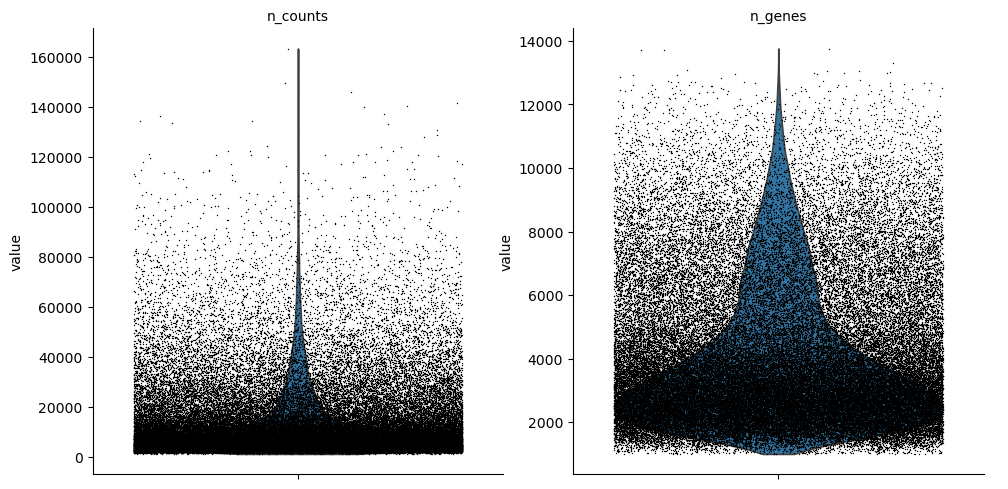

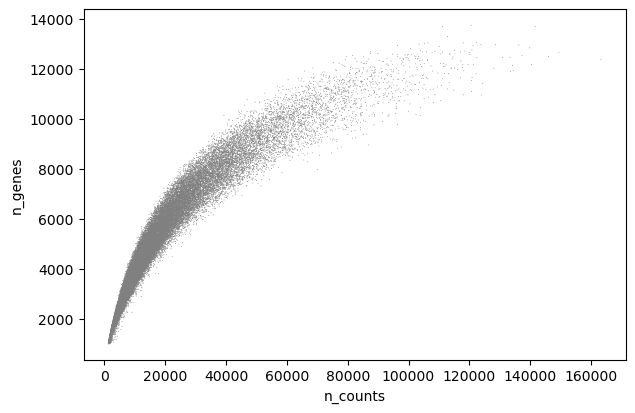

In [74]:
# 1. Calculation of QC metrics and addition to adata.obs
sc.pp.calculate_qc_metrics(adata, inplace = True)

# 2. Visualization of QC metrics before filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # Violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

### b - Filtering out low quality cells

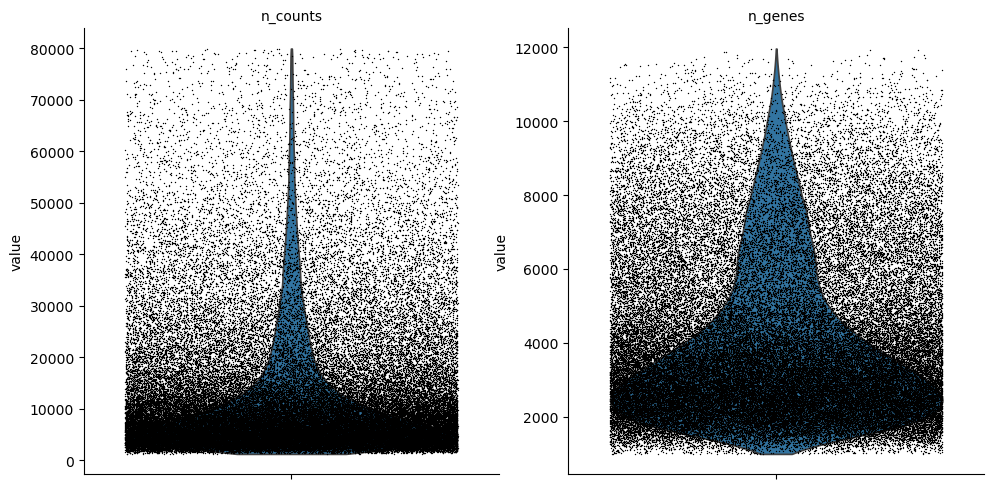

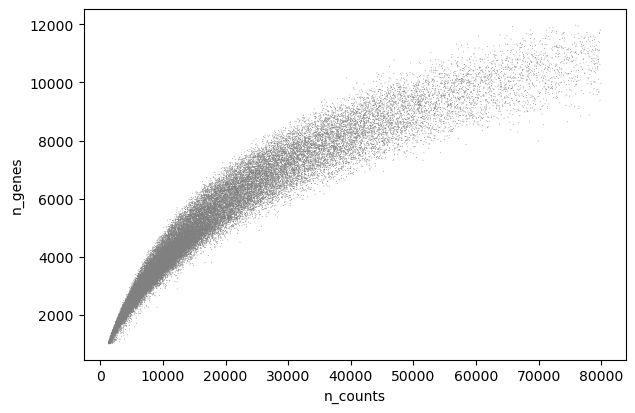

In [75]:
# 3. Application of filters
adata = adata[adata.obs['n_genes'] < 12000, :] # cutoff chosen: 12 000 genes

adata = adata[adata.obs['n_counts'] < 80000, :] # cutoff chosen: 80 000 counts

# 4. Visualization of QC metrics after filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

### c - Filtering out mitochondrial genes

In [76]:
# Counting the number of mitochondrial genes
adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")

# Calculating QC metrics including the percentage of mitochondrial genes and adding them to adata.obs
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars = ["mt"],
    inplace = True,
    log1p = True
)

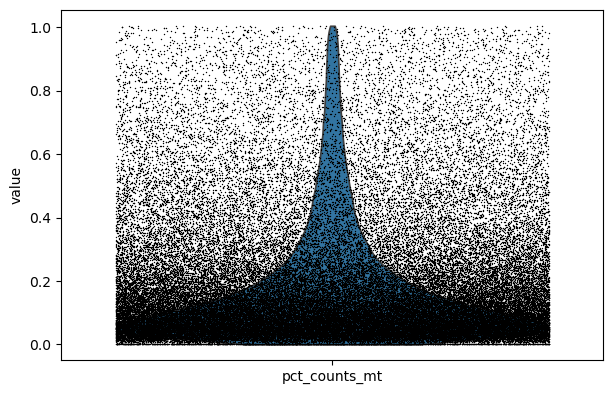

In [77]:
# Visualization of the percentage of mitochondrial genes
sc.pl.violin(
    adata,
    keys='pct_counts_mt',
    jitter = 0.4,
    rotation=  0,   
    stripplot = True,
    show = True
)

# data was already filtered on pct_counts_mt 
# it's weird because even before the filtering there was no cell with >10%. 
# They must have been filtered before
# I still keep the line just in case
# Filtering cells with more than 10% mitochondrial gene expression
adata_hvgadata = adata[adata.obs['pct_counts_mt'] < 10, :]


Here, we note that there were no cells with more than 10% mitochondrial gene expression in the dataset even before we applied our own filter. This means that the dataset did not contain such cells, either because of the nature of the data or because the dataset was already treated and filtered.

### d - Excluding ribosomal and hemoglobin genes
We will be keeping ribosomal genes, which make up 1.5% of genes expressed, and filtering out hemoglobin genes.

In [78]:
# 1m3s
# Ribosomal genes
adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))
print("proportion of ribo genes in all expressed genes : ", adata.var["ribo"].sum()/len(adata.var)*100)

# Hemoglobin genes
adata.var["hb"] = adata.var['gene_name'].str.contains("^HB[^(P)]")
print("Number of hemo genes before deletion : ", adata.var["hb"].sum())

# Confirming that hb genes were properly removed
genes_to_keep = ~adata.var["hb"]
adata = adata[:, genes_to_keep].copy()
print("Number of hemo genes after deletion: ", adata.var["hb"].sum())

proportion of ribo genes in all expressed genes :  1.5127574906367043
Number of hemo genes before deletion :  9
Number of hemo genes after deletion:  0


### e-important : répercuter le même filtrage sur adata_raw

In [79]:
adata_raw = adata_raw[adata.obs_names, adata.var_names].copy() #répercuter le même filtrage sur adata_raw

## 2. Normalization

this part was already performed, so we are not doing it again (How did they normalize?)

In [80]:
sc.pp.log1p(adata)

## 3. Highly Variable Genes (HVGs)

we kept 3000 highly variable genes out of 34167 genes


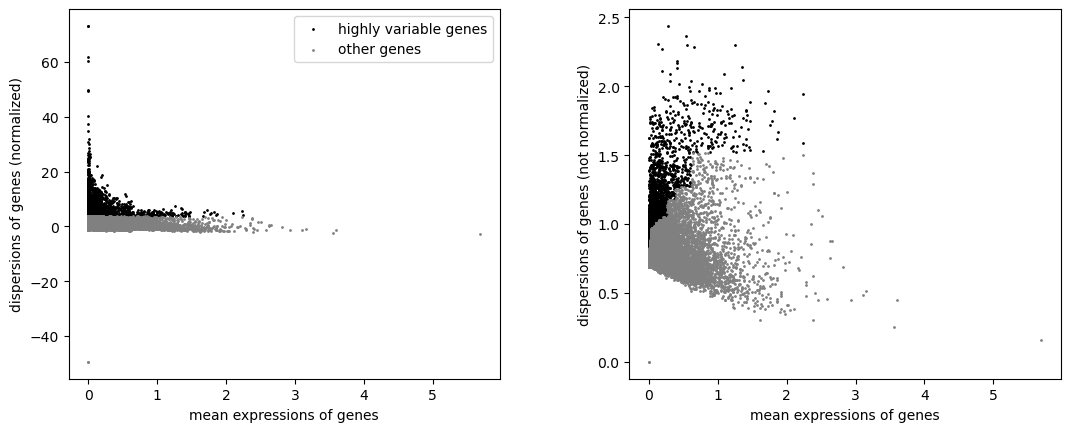

In [81]:
nHVG = 3000 

sc.pp.highly_variable_genes(
    adata, 
    flavor='cell_ranger',
    n_top_genes=nHVG
)

print("we kept", nHVG, "highly variable genes out of", adata.shape[1], "genes")
sc.pl.highly_variable_genes(adata)

In [82]:
adata.var['highly_variable'].value_counts()

highly_variable
False    31167
True      3000
Name: count, dtype: int64

new AnnData object with the HVG only

In [83]:
adata_hvg = adata[:, adata.var['highly_variable']].copy()

## 4. Scaling & PCA

In [84]:
# Scaling (3s)
sc.pp.scale(adata_hvg, max_value = 10)

In [85]:
# PCA (1min30))
sc.tl.pca(adata_hvg)


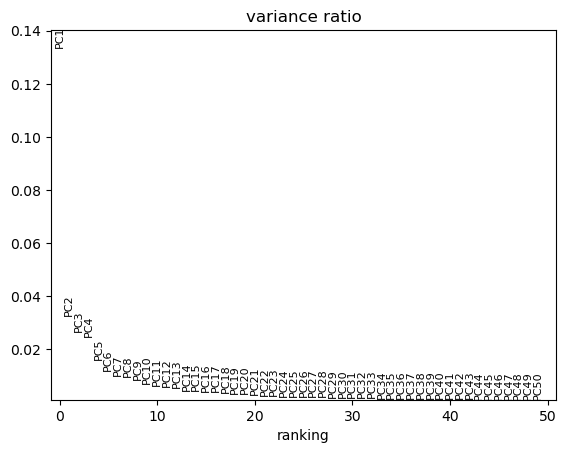

In [86]:
sc.pl.pca_variance_ratio(adata_hvg, n_pcs = 50) # elbow plot to see how many PCs to keep

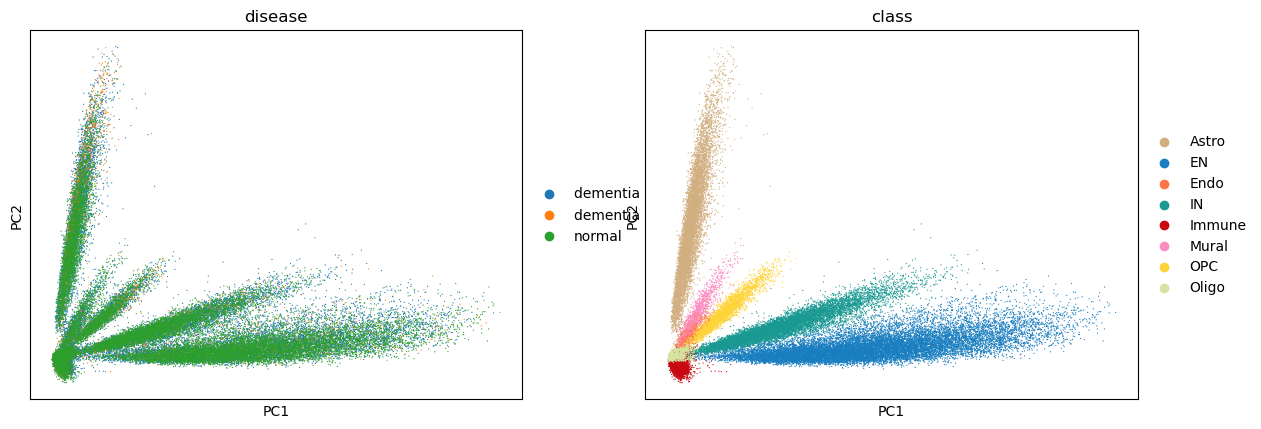

In [87]:
sc.pl.pca(
    adata_hvg,
    color = ["disease", "class"],
    ncols = 3,
    size = 3,
)

## 5. Batch effect correction

In [88]:
# 37 sec
import bbknn
# bbknn.bbknn(adata_hvg, batch_key='donor_id')
sc.external.pp.bbknn(adata_hvg, batch_key="donor_id")

## 6. Clustering

In [89]:
adata_hvg.obs["class"].value_counts()

class
Oligo     29919
EN        17717
IN        10258
Astro      9235
Immune     4270
OPC        3085
Mural      1348
Endo        740
Name: count, dtype: int64

In [90]:
donors_by_class_and_subclass = (adata_hvg.obs.groupby(["class", "subclass"], observed=True)["donor_id"].nunique())
donors_by_class_and_subclass

class   subclass     
Astro   Astro            17
EN      EN_L2_3_IT       17
        EN_L3_5_IT_1     17
        EN_L3_5_IT_2     17
        EN_L3_5_IT_3     17
        EN_L5_6_NP       16
        EN_L5_ET          5
        EN_L6B           16
        EN_L6_CT         16
        EN_L6_IT_1       16
        EN_L6_IT_2       15
Endo    Endo             17
IN      IN_ADARB2        17
        IN_LAMP5_LHX6    17
        IN_LAMP5_RELN    17
        IN_PVALB         17
        IN_PVALB_CHC     17
        IN_SST           17
        IN_VIP           17
Immune  Micro            17
        PVM              16
        Adaptive         12
Mural   VLMC             16
        SMC              13
        PC               17
OPC     OPC              17
Oligo   Oligo            17
Name: donor_id, dtype: int64

### Neighbors

In [91]:
# 25 sec
# number of neighbors
# we chose 30 PCs because after that the variance ratio doesn't decrease that much
nPC = 30

sc.pp.neighbors(
    adata_hvg,
    n_neighbors=30,      # plus grand → structure plus globale, moins de petits fragments
    n_pcs=nPC,            # tu peux monter à 40–50 si tu veux
    metric="euclidean",
    random_state=42,
)

### Clustering

In [92]:
#import igraph
#import leidenalg

sc.tl.leiden(adata_hvg, resolution = 0.02)

print("Number of clusters :", len(adata_hvg.obs['leiden'].cat.categories))

Number of clusters : 10


### UMAP

In [93]:
# 2 min 46
sc.tl.umap(
    adata_hvg,
    min_dist=0.8,        # 0.8 au lieu de 0.5 → clusters un peu plus serrés
    random_state=40,
)

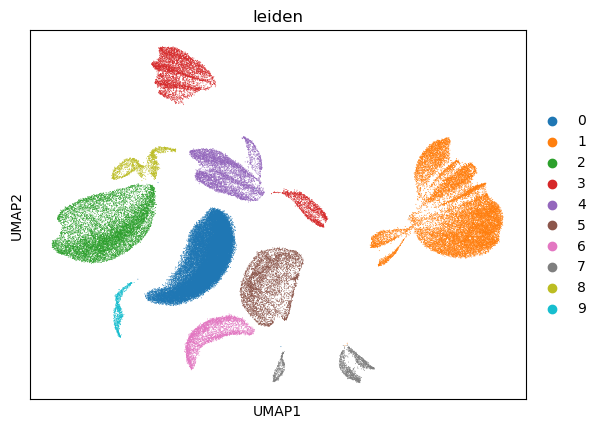

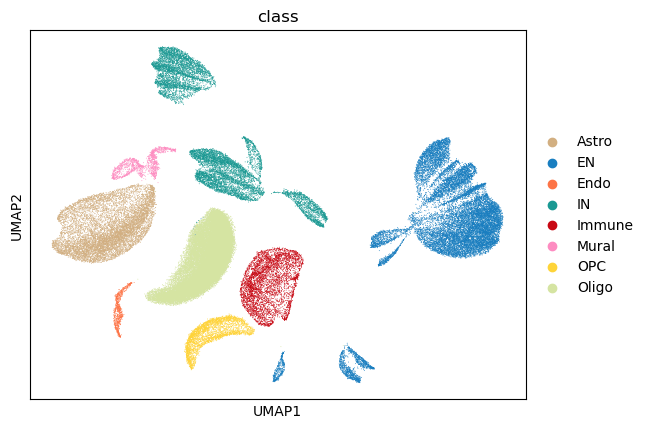

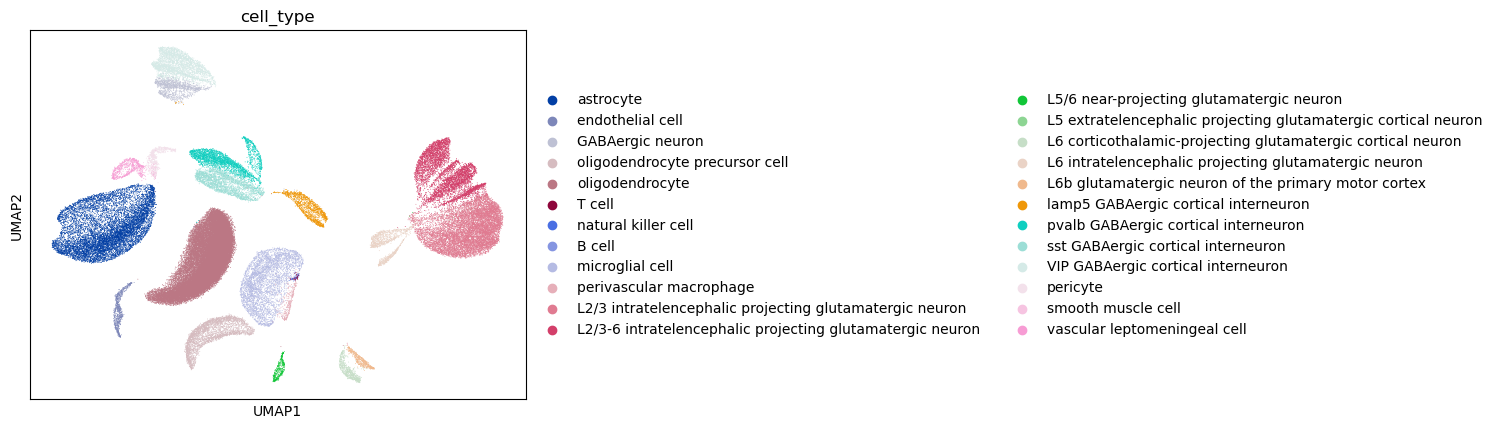

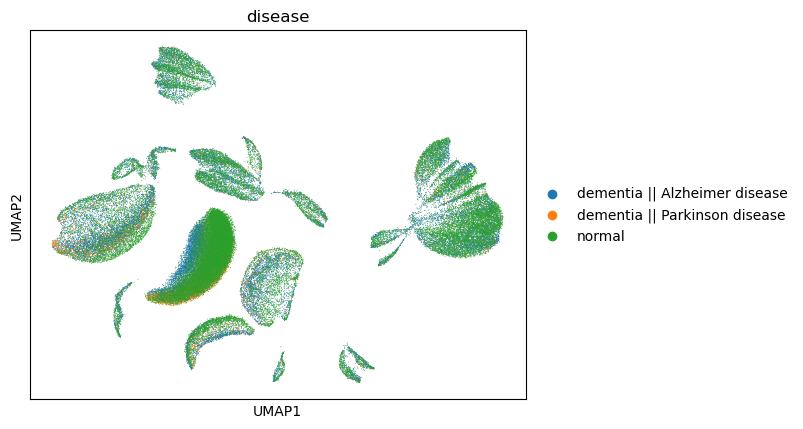

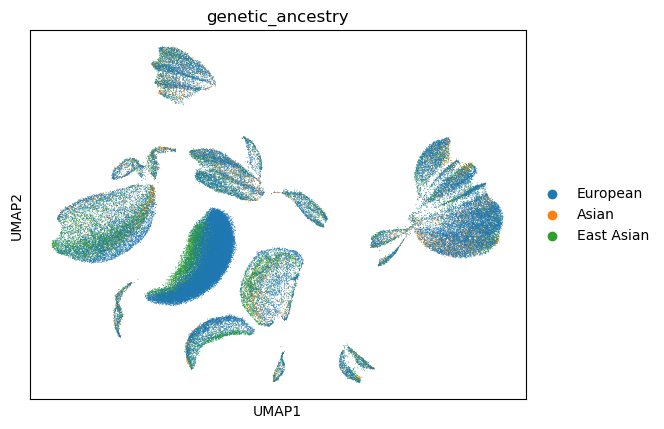

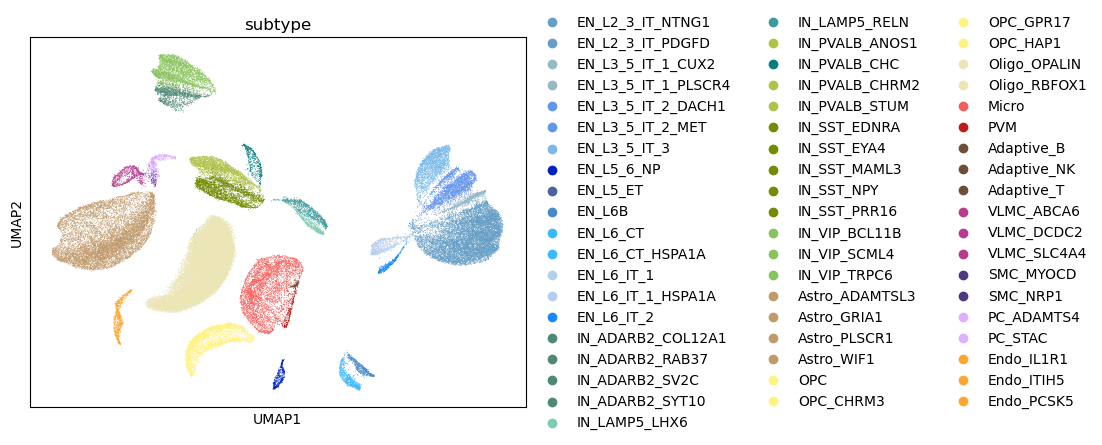

In [94]:

sc.pl.umap(adata_hvg, color="leiden")

sc.pl.umap(adata_hvg, color="class")

sc.pl.umap(adata_hvg, color='cell_type')

sc.pl.umap(adata_hvg, color="disease")
sc.pl.umap(adata_hvg, color="genetic_ancestry")

sc.pl.umap(adata_hvg, color='subtype')

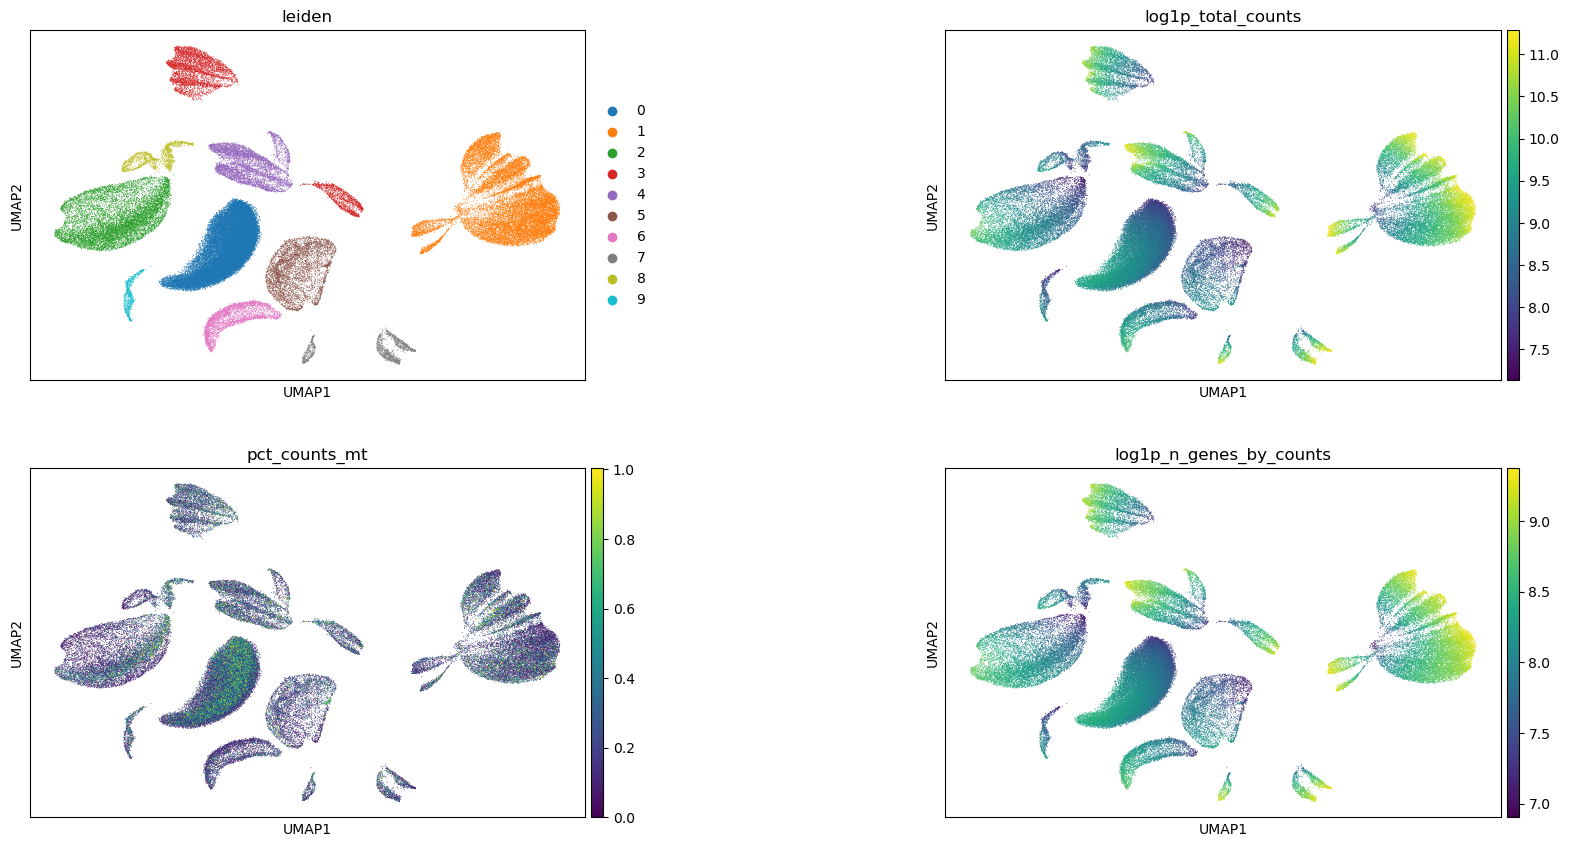

In [95]:
sc.pl.umap(
    adata_hvg,
    color = ["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace = 0.5,
    ncols = 2,
)

## 7. Manual Annotation

### **7.1 Manual Annotation**

#### Marker gene set
We first define known marker genes of the cell types that we think are represented by the clusters. We only keep the genes in that list that are found in our data.

In [ ]:
# Define marker genes for each cell type
marker_genes = {
    "Astrocytes" : ["ENSG00000135821", "ENSG00000125398", "ENSG00000171885", "ENSG00000152661", "ENSG00000165795", "ENSG00000131095", "ENSG00000144908"],
    "Endothelial cells" : ["ENSG00000184113", "ENSG00000229515"],
    "Immune cells" : ["ENSG00000125730", "ENSG00000019582" ,"ENSG00000168329","ENSG00000182578", "ENSG00000173372"],
    "Oligodendrocytes" : ["ENSG00000197971", "ENSG00000204655", "ENSG00000123560", "ENSG00000168314", "ENSG00000105695", "ENSG00000172270","ENSG00000204351", "ENSG00000087086",  "ENSG00000115310",  "ENSG00000140076",  "ENSG00000205927", "ENSG00000100146"],
    "OPC" : ["ENSG00000184221", "ENSG00000205927", "ENSG00000150275", "ENSG00000134853"],
    "Excitatory Neurons" : ["ENSG00000070808", "ENSG00000154146", "ENSG00000119042", "ENSG00000104888"],
    "Inhibitory Neurons" : ["ENSG00000128683", "ENSG00000136750"],
    "Mural" : ["ENSG00000113721", "ENSG00000175084", "ENSG00000173546", 'ENSG00000168826', "ENSG00000074181" ]
    }

marker_genes

# Only keep the marker genes find in our data

marker_genes_in_data = {}
for ct, markers in marker_genes.items():
    markers_found = []
    for marker in markers:
        if marker in adata_hvg.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

marker_genes_in_data
 

{'Astro': ['ENSG00000171885',
  'ENSG00000152661',
  'ENSG00000131095',
  'ENSG00000144908'],
 'Endo': ['ENSG00000184113'],
 'Micro': ['ENSG00000125730',
  'ENSG00000019582',
  'ENSG00000168329',
  'ENSG00000182578'],
 'Oligo': [],
 'OPC': ['ENSG00000150275', 'ENSG00000134853'],
 'EN': ['ENSG00000119042'],
 'IN': ['ENSG00000128683', 'ENSG00000136750'],
 'Mural': ['ENSG00000074181']}

Listing cell types we want to show the markers for:

In [ ]:
cell_types = ["Astrocytes", "Endothelial cells", "Immune cells", "Oligodendrocytes", "OPC", "Excitatory Neurons", "Inhibitory Neurons", "Mural"]
cell_types

['Astro', 'Endo', 'Micro', 'Oligo', 'OPC', 'EN', 'IN', 'Mural']

Plotting one UMAP per marker for each cell type:

ASTRO:


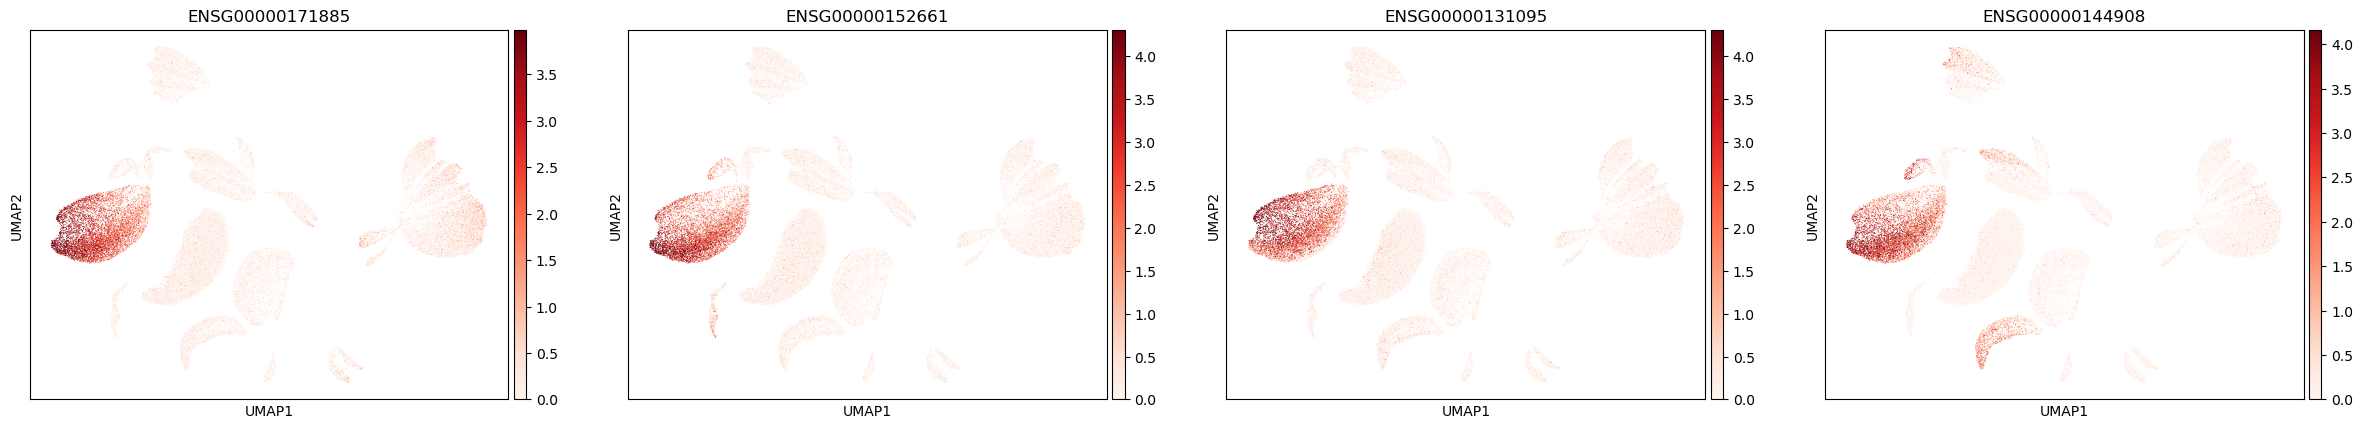





ENDO:


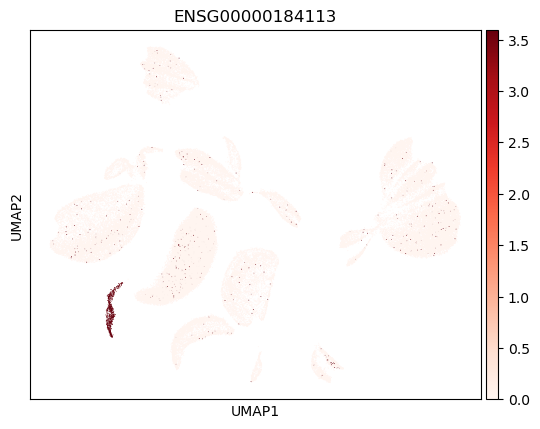





MICRO:


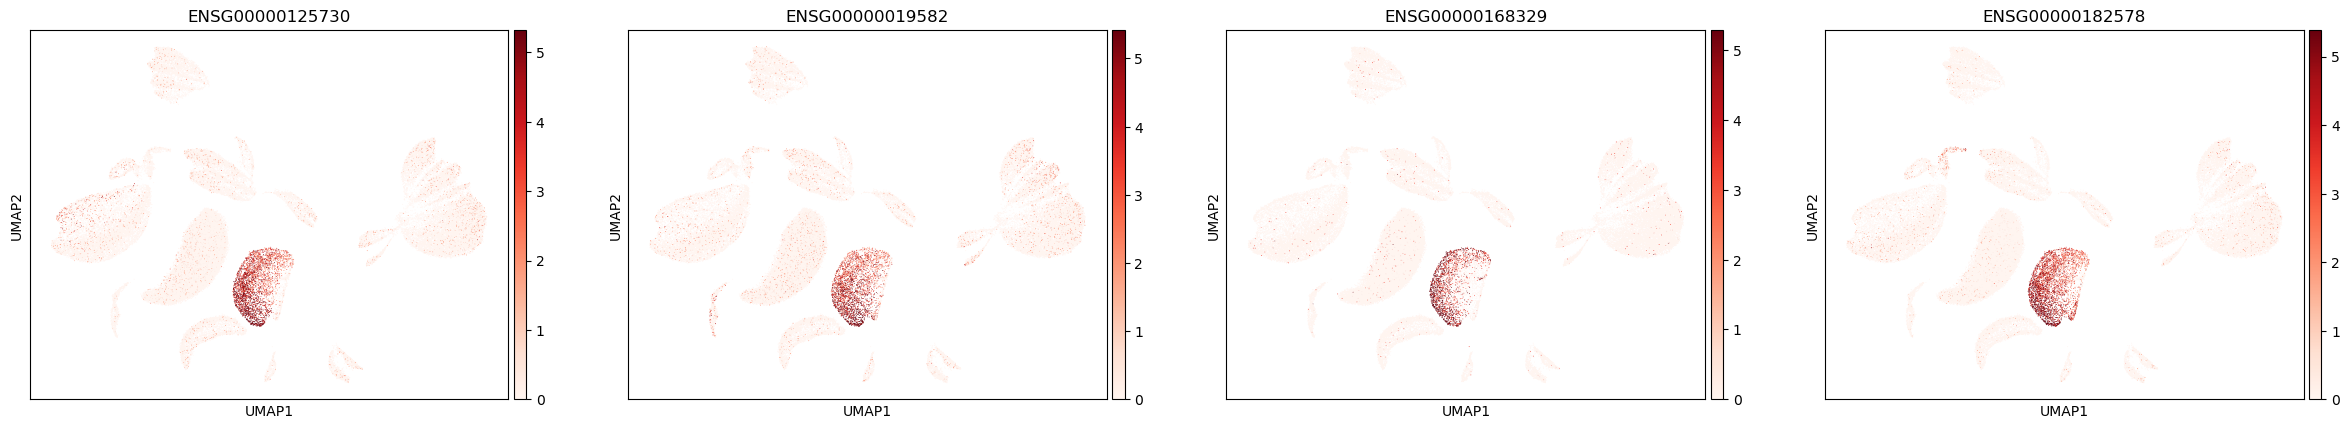





OLIGO: No marker genes found in data.

OPC:


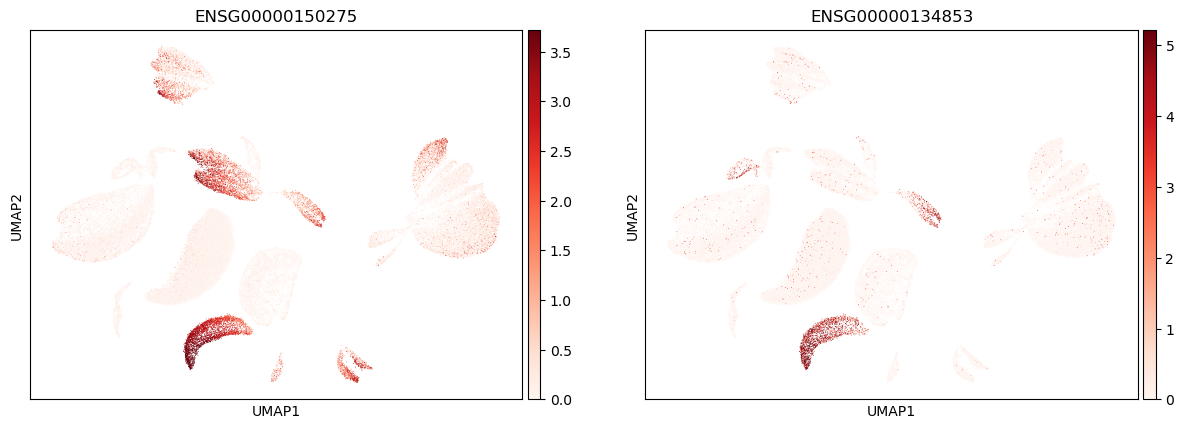





EN:


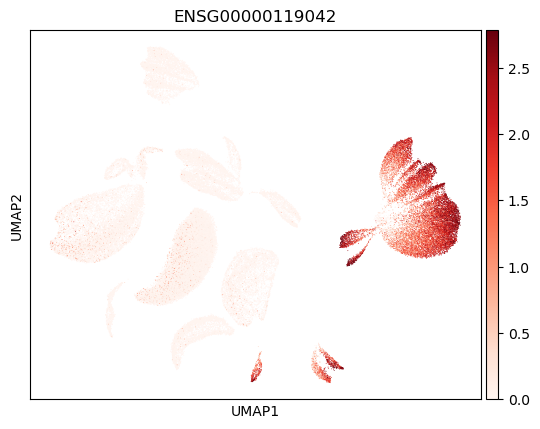





IN:


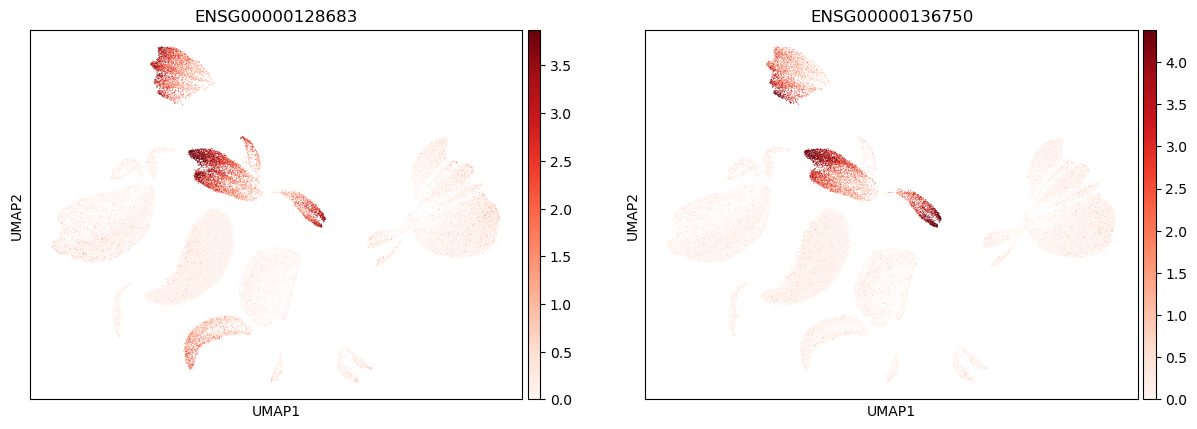





MURAL:


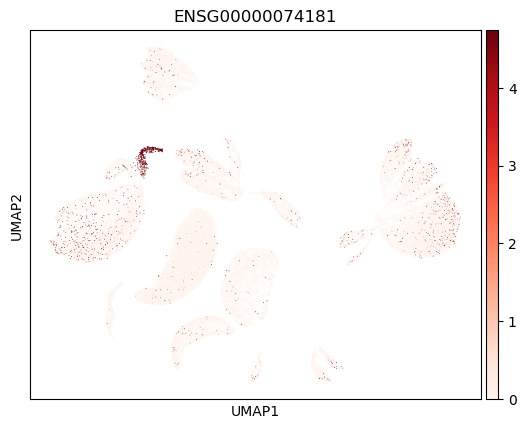

In [98]:
for ct in cell_types:
    markers = marker_genes_in_data[ct]
    if not markers:  # Skip if the list is empty
        print(f"{ct.upper()}: No marker genes found in data.\n")
        continue
    
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata_hvg,
        color = markers,
        vmin = 0,
        vmax = "p99",
        sort_order = False,
        cmap = "Reds",
    )
    
    print("\n\n\n")  # print white space for legibility

Dotplot visualization of marker gene expression per cluster:

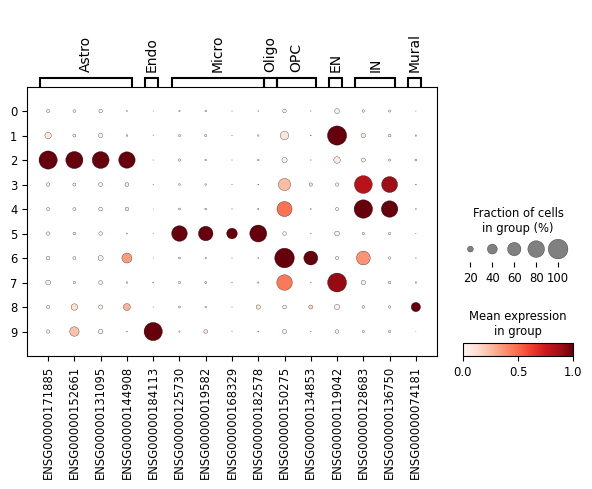

In [99]:
sc.pl.dotplot(
    adata_hvg,
    groupby = "leiden",
    var_names = marker_genes_in_data,
    standard_scale = "var",  # standard scale: normalize each gene to range from 0 to 1
)

Referring to both representations, we can manually annotate the clusters:

In [ ]:
cl_annotation = {
    "0": "Oligodendrocytes",
    "1": "Excitatory Neurons",
    "2": "Astrocytes", 
    "3": "Inhibitory Neurons",
    "4": "Inhibitory Neurons", 
    "5" : "Immune cells", 
    "6" : "OPC",
    "7" : "Excitatory Neurons",
    "8" : "Mural",
    "9" : "Endothelial cells"
}

To visualize the annotations:

... storing 'manual_celltype_annotation' as categorical


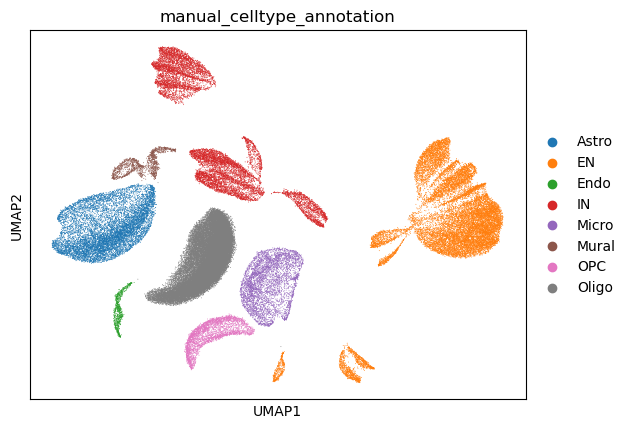

In [101]:
adata_hvg.obs["manual_celltype_annotation"] = adata_hvg.obs.leiden.map(cl_annotation)

sc.pl.umap(adata_hvg, color = ["manual_celltype_annotation"])

To confirm our annotations, we can find the differentially expressed genes for each cluster as compared to the others. We also want to use this to distinguish clusters 4 and 5.

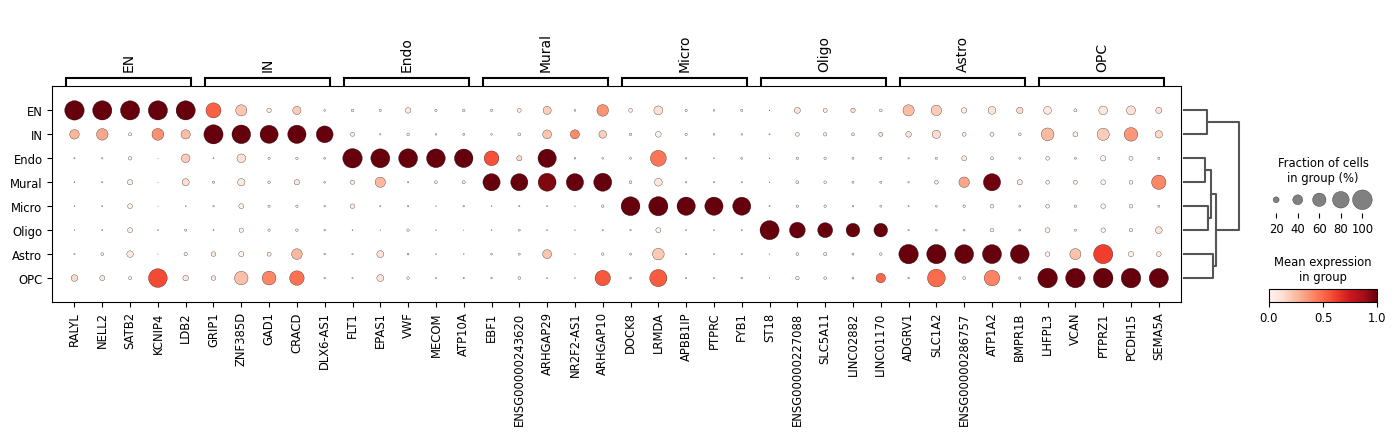

In [102]:
# Calculating differentially expressed genes for each cluster 
    ## We are using the rank_genes_groups function from scanpy for annotations, but for downstream analyses, we will do pseudo-bulk differential expression to avoid pseudoreplication issues

sc.tl.rank_genes_groups(
    adata_hvg, groupby = "manual_celltype_annotation", method = "wilcoxon", key_added = "dea_leiden", var_names="gene_name"
)

# Visualizing the expression of the 5 top DE genes per cluster (dotplot representation)
sc.pl.rank_genes_groups_dotplot(
    adata_hvg, groupby = "manual_celltype_annotation", standard_scale = "var", n_genes = 5, key = "dea_leiden" , gene_symbols="gene_name"
)

## **7. Differential Gene Expression**

### *Pseudobulk*

In [120]:
x = (adata_raw.obs.groupby([ "disease"], observed=True)["donor_id"].nunique())
print("The number of donor per disease condition :\n",x)
print("\nThe number of cells per disease condition ;")
adata_raw.obs.groupby(["class", "disease"]).size().unstack(fill_value=0)

The number of donor per disease condition :
 disease
dementia || Alzheimer disease    8
dementia || Parkinson disease    3
normal                           6
Name: donor_id, dtype: int64

The number of cells per disease condition ;


disease  dementia || Alzheimer disease  dementia || Parkinson disease  normal
class                                                                        
Astro                             4620                           1128    3487
EN                                7602                            804    9311
Endo                               417                             39     284
IN                                4695                            539    5024
Immune                            2188                            383    1699
Mural                              684                             69     595
OPC                               1256                            323    1506
Oligo                            10242                           4461   15216

pseudo-bulk matrix (=pb) : 

- lines : cell type per donor 
- columns : mean expression levels

each donor is an indepedant observation. We cannot compare each cell one by one because it's statistically false. We do a pseudo-bulk donor x cell type.

Each value corresponds to the mean log-normalized of 1 donor for 1 cell type

In [ ]:
# Creation of dataframe for pseudobulk
df = adata_raw.to_df()  # 
meta = adata_raw.obs[["donor_id", "class", "disease"]]

df["donor_id"] = meta["donor_id"].values
df["class"] = meta["class"].values
df["disease"] = meta["disease"].values

pb = (df.groupby(["class", "donor_id", "disease"]).sum()) # sum of n_counts per class, donor and disease
pb = pb[pb.sum(axis=1) != 0] # deleting empty lines
pb = pb.reset_index()

# check if the dataframe is of correct shape
if pb.shape[0] == len((adata.obs["donor_id"].cat.categories))* len((adata.obs["class"].cat.categories)) and pb.shape[1] == len(adata_raw.var)+3 :
    print("Dataframe IS OK : no donor or gene were deleted")
else : 
    print("WARNING : wrong number of donors")
pb

In [112]:
# saving the pseudobulk matrix into csv
pb.to_csv("pseudobulk_matrix.csv", index = False)

### *Differential analysis is done in R*

example of a DE  

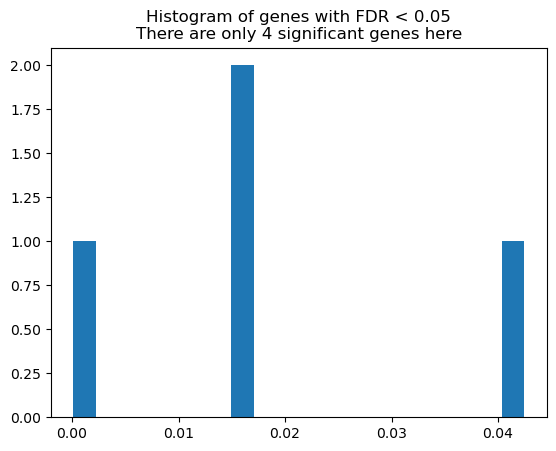

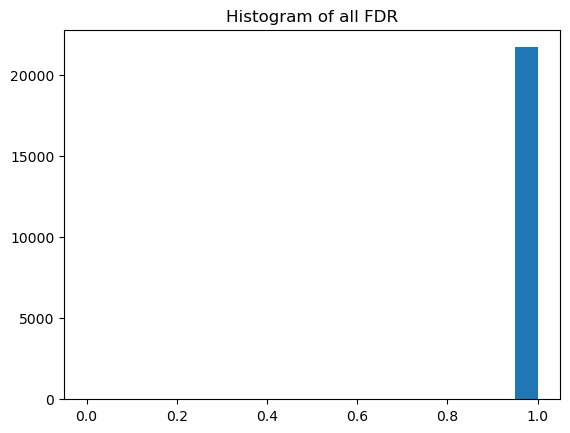

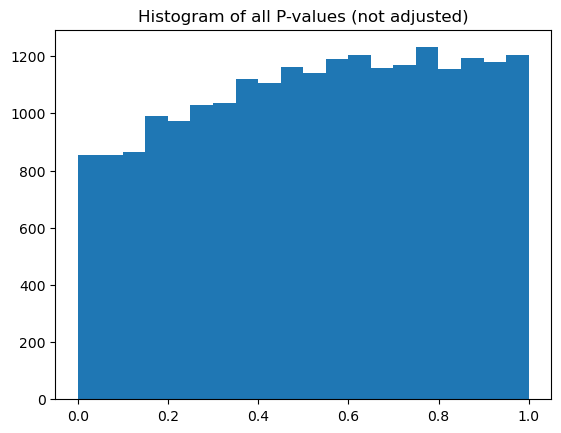

logFC    logCPM          F        PValue       FDR
gene                                                                  
ENSG00000026508 -2.192966  1.817744  75.958392  5.298840e-09  0.000116
ENSG00000259520 -2.348001  2.874461  41.200614  1.394094e-06  0.015099
ENSG00000188393  4.813545  0.349007  33.295073  2.076138e-06  0.015099
ENSG00000225231  4.497031  1.948137  32.146706  7.784117e-06  0.042458

In [145]:
x = pd.read_csv("edgeR_results/edgeR_IN_AD_vs_CTRL.csv",index_col=0)
plt.hist(x[x["FDR"]< 0.05]["FDR"],bins=20) 
plt.title("Histogram of genes with FDR < 0.05\nThere are only 4 significant genes here")
plt.show()

plt.hist(x["FDR"],bins=20) 
plt.title("Histogram of all FDR")
plt.show()

plt.hist(x["PValue"],bins=20) 
plt.title("Histogram of all P-values (not adjusted)")
plt.show()

x[x["FDR"]<0.05] # every gene where padj < 0.05


In [ ]:
import glob
import seaborn as sns

# 1) repérer tous les fichiers edgeR
files = [f for f in glob.glob("edgeR_results/edgeR_*_*.csv") if "_GENESYMBOL" not in f]

rows = []  # on stocke ici cell_type, comparison, score

for f in files:
    base = f.split("/")[-1].replace(".csv", "")
    parts = base.split("_")
    cell_type = parts[1]
    comparison = " ".join(parts[2:])  

    df = pd.read_csv(f, index_col=0)

    # adapter les noms de colonnes si besoin
    logfc_col = "logFC"
    fdr_col   = "FDR"   # ou "padj" / "adj.P.Val" selon tes fichiers

    # supp les NA de FDR
    df = df.dropna(subset=[fdr_col])

    # garder gènes significatifs
    sig = df[df[fdr_col] < 0.05].copy()
    if sig.empty:
        score = 0.0  # pas de gènes DE → score neutre
    else:
        signed_weight = -np.log10(sig[fdr_col]) * np.sign(sig[logfc_col])
        score = signed_weight.mean()

    rows.append({"cell_type": cell_type,
                 "comparison": comparison,
                 "score": score})

scores = pd.DataFrame(rows)

# 2) matrice cell_type × comparison
heat = scores.pivot(index="cell_type", columns="comparison", values="score")
heat = heat.reindex(sorted(heat.index))  # optionnel : trier les cell types
heat

comparison  AD vs CTRL  AD vs PD  PD vs CTRL
cell_type                                   
Astro         0.000000  0.000000    0.000000
EN           -3.760928  0.000000    0.698813
Endo          0.000000  0.000000    0.000000
IN           -0.641242 -1.860764    1.589341
Immune        0.000000  0.000000    0.000000
Mural         0.000000  0.000000    0.000000
OPC          -1.651294  0.000000    0.000000
Oligo         1.321942 -1.495524    2.515792

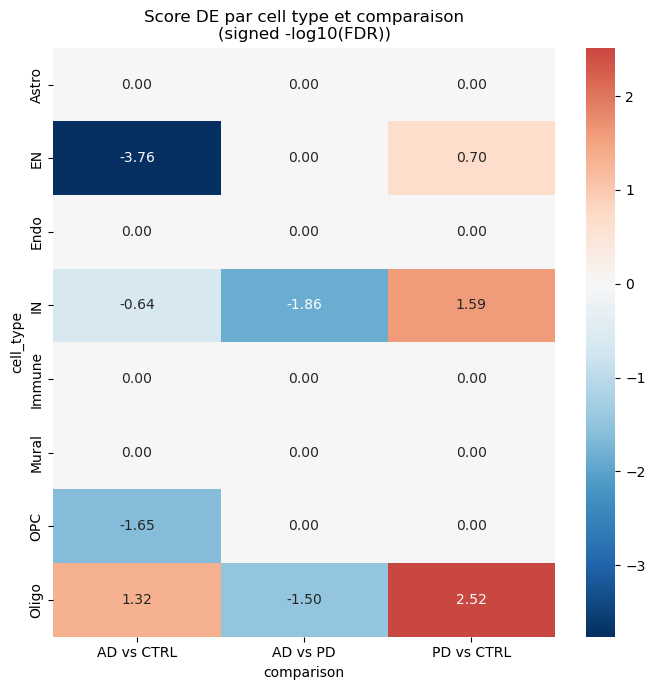

In [160]:
plt.figure(figsize=(7, 7))
sns.heatmap(
    heat,
    cmap="RdBu_r",      # bleu = down, rouge = up
    center=0,           # 0 = neutre
    annot=True,         # valeurs écrites, tu peux mettre False si ça fait trop chargé
    fmt=".2f"
)
plt.title("Score DE par cell type et comparaison\n(signed -log10(FDR))")
plt.tight_layout()
plt.show()

if = 0.00 : it means that there are no significant genes at all in the group

there rest are a score of the log2FC and the FDR to show the global significance and the direction of the change. Meaning that warmer the color, more there are upregulated DEG with significant padj. We can only say that a cellular type is showing a global transcriptional disregulation, and if this disregulation is up or down. That cell type could be impacted by the pathology.

To search later : is this a pathological signature ? = "pathological signatures per cell type", "cell-intrisic alterations"

    score_celltype = sign(median(logFC)) * ( -log10( median(FDR_significatifs) ) )

# **JUSTIFYING THAT THE DATASET IS IN RAW COUNTS**

In [ ]:
import numpy as np
from scipy import sparse

X = adata.X
X_csr = X if sparse.issparse(X) else sparse.csr_matrix(X)

data = X_csr.data  # valeurs non nulles

# Écart max entre la valeur et l’entier le plus proche
max_frac = np.max(np.abs(data - np.round(data)))
print("Max difference to integer:", max_frac)

Max difference to integer: 0.49997663


In [ ]:
import numpy as np

cell_sums = np.array(X_csr.sum(axis=1)).ravel()

print("Premieres sommes de X:", cell_sums[:10])
print("Premier n_counts:", adata.obs["n_counts"].head(10).values)

print("Tout pareil ? ", np.allclose(cell_sums, adata.obs["n_counts"].values))

Premieres sommes de X: [ 2934.5508   827.2049  2892.3923  2957.928   7648.7583  1224.5441
  1764.7788 10337.452   2810.9097  6597.6006]
Premier n_counts: [ 6236.  1444.  6086.  6582. 27425.  2493.  3504. 36665.  6796. 17375.]
Tout pareil ?  False


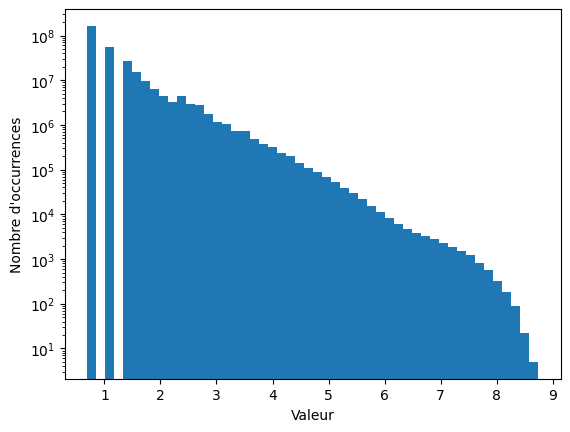

Min non-zero: 0.6931472
Max: 8.739536


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

vals = data  # non-zero
plt.hist(vals, bins=50)
plt.yscale("log")
plt.xlabel("Valeur")
plt.ylabel("Nombre d'occurrences")
plt.show()

print("Min non-zero:", vals.min())
print("Max:", vals.max())
print("Quelques valeurs uniques:", np.unique(vals)[:20])
print("Nb de valeurs distinctes:", len(np.unique(vals)))

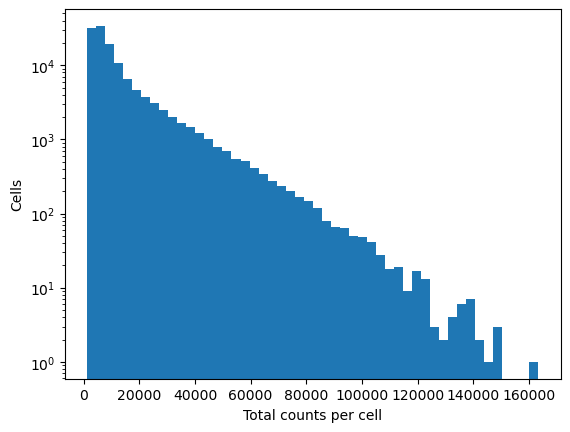

count    128932.000000
mean      12646.060547
std       14012.671875
min        1247.000000
25%        4501.000000
50%        7540.000000
75%       14416.000000
max      163298.000000
Name: n_counts, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

plt.hist(adata.obs["n_counts"], bins=50)
plt.xlabel("Total counts per cell")
plt.ylabel("Cells")
plt.yscale("log")
plt.show()

print(adata.obs["n_counts"].describe())

In [ ]:
import numpy as np

vals = data
print("quantiles X:", np.quantile(vals, [0.5, 0.9, 0.99, 0.999]))

log_vals = np.log1p(vals)
print("quantiles log1p(X):", np.quantile(log_vals, [0.5, 0.9, 0.99, 0.999]))

quantiles X: [  1.   6.  30. 127.]
quantiles log1p(X): [0.69314718 1.9459101  3.43398714 4.85203028]


In [ ]:
max_frac
np.allclose(cell_sums, adata.obs["n_counts"])
vals.min(), vals.max()
np.unique(vals)[:20]
len(np.unique(vals))
adata.obs["n_counts"].describe()

count    128932.000000
mean      12646.060547
std       14012.671875
min        1247.000000
25%        4501.000000
50%        7540.000000
75%       14416.000000
max      163298.000000
Name: n_counts, dtype: float64

# **GSEA**

Loading the DE results:

In [ ]:
#files = glob.glob("edgeR_results/*.csv") #run this if you want to run the mygene chunk

files = [f for f in glob.glob("edgeR_results/*.csv") if "_GENESYMBOL" not in f]
files

['edgeR_results\\edgeR_Astro_AD_vs_CTRL_GENESYMBOL.csv',
 'edgeR_results\\edgeR_Astro_AD_vs_PD_GENESYMBOL.csv',
 'edgeR_results\\edgeR_Astro_PD_vs_CTRL_GENESYMBOL.csv',
 'edgeR_results\\edgeR_Endo_AD_vs_CTRL_GENESYMBOL.csv',
 'edgeR_results\\edgeR_Endo_AD_vs_PD_GENESYMBOL.csv',
 'edgeR_results\\edgeR_Endo_PD_vs_CTRL_GENESYMBOL.csv',
 'edgeR_results\\edgeR_EN_AD_vs_CTRL_GENESYMBOL.csv',
 'edgeR_results\\edgeR_EN_AD_vs_PD_GENESYMBOL.csv',
 'edgeR_results\\edgeR_EN_PD_vs_CTRL_GENESYMBOL.csv',
 'edgeR_results\\edgeR_Immune_AD_vs_CTRL_GENESYMBOL.csv',
 'edgeR_results\\edgeR_Immune_AD_vs_PD_GENESYMBOL.csv',
 'edgeR_results\\edgeR_Immune_PD_vs_CTRL_GENESYMBOL.csv',
 'edgeR_results\\edgeR_IN_AD_vs_CTRL_GENESYMBOL.csv',
 'edgeR_results\\edgeR_IN_AD_vs_PD_GENESYMBOL.csv',
 'edgeR_results\\edgeR_IN_PD_vs_CTRL_GENESYMBOL.csv',
 'edgeR_results\\edgeR_Mural_AD_vs_CTRL_GENESYMBOL.csv',
 'edgeR_results\\edgeR_Mural_AD_vs_PD_GENESYMBOL.csv',
 'edgeR_results\\edgeR_Mural_PD_vs_CTRL_GENESYMBOL.csv',
 'ed

We first need to match the gene IDs in our list to those in the gene set libraries that will be used later:

In [ ]:
#This takes super long- don't run it again if you don't need to, I already saved the files and they're in the repo!

#mg = mygene.MyGeneInfo()

#for file in files:
    #print("Reading:", file)
    #df = pd.read_csv(file)

    # Rename "gene" column to "gene_ensembl" to avoid having 2 "gene" columns in the final file
    #if "gene" in df.columns:
        #df.rename(columns={"gene": "gene_ensembl"}, inplace=True)

    # Remove version numbers
    #df["gene_ensembl"] = df["gene_ensembl"].str.split(".").str[0]

    # Convert Ensembl IDs to gene symbols
    #out = mg.querymany(
        #df["gene_ensembl"].tolist(),
        #scopes="ensembl.gene",
        #fields="symbol",
        #species="human"
    #)

    # Build mapping dictionary
    #mapping = {item["query"]: item.get("symbol", None) for item in out}

    # Apply mapping
    #df["gene_symbol"] = df["gene_ensembl"].map(mapping)

    # Drop rows without valid gene symbols
    #df = df.dropna(subset=["gene_symbol"])

    # Uppercase symbols
    #df["gene_symbol"] = df["gene_symbol"].str.upper()

    # Final GSEA-ready column
    #df.rename(columns={"gene_symbol": "gene"}, inplace=True)

    # Save new file
    #new_filename = file.replace(".csv", "_genesymbol.csv")
    #df.to_csv(new_filename, index=False)
    #print("Saved:", new_filename)

    # Load the cleaned file back into df to use for the rest of the analysis
    #df = pd.read_csv(new_filename)

In [ ]:
# Check that the "gene" column now contains gene symbols
#print(df["gene"].head())

GSEA requires a ranked list of genes. To rank our genes for each file, we can create a function:

In [ ]:
def prepare_ranking(df):
    df = df.dropna(subset = ["gene", "logFC", "PValue"])
    df["ranking"] = df["logFC"] * -np.log10(df["PValue"])
    df = df[["gene", "ranking"]].sort_values("ranking", ascending = False)
    return df

Loading the needed gene set libraries:

In [ ]:
#libs = [
#    "PanglaoDB_Augmented_2021",
 #   "CellMarker_Augmented_2021",
  #  "GO_Biological_Process_2021",
   # "Reactome_2022",
    #"KEGG_2021_Human"
#]

libs = ["PanglaoDB_Augmented_2021", "MSigDB_Hallmark_2020", "GO_Biological_Process_2021"]

for lib in libs:
    try:
        gp.get_library(name = lib, organism = "Human")
        print(f"Loaded: {lib}")
    except Exception as e:
        print(f"FAILED: {lib} → {e}")

Loaded: PanglaoDB_Augmented_2021
Loaded: MSigDB_Hallmark_2020
Loaded: GO_Biological_Process_2021


Running preranked GSEA:

In [ ]:
# Check that the files with gene symbols are being detected
print("Files detected:", files)

Files detected: ['edgeR_results\\edgeR_Astro_AD_vs_CTRL_GENESYMBOL.csv', 'edgeR_results\\edgeR_Astro_AD_vs_PD_GENESYMBOL.csv', 'edgeR_results\\edgeR_Astro_PD_vs_CTRL_GENESYMBOL.csv', 'edgeR_results\\edgeR_Endo_AD_vs_CTRL_GENESYMBOL.csv', 'edgeR_results\\edgeR_Endo_AD_vs_PD_GENESYMBOL.csv', 'edgeR_results\\edgeR_Endo_PD_vs_CTRL_GENESYMBOL.csv', 'edgeR_results\\edgeR_EN_AD_vs_CTRL_GENESYMBOL.csv', 'edgeR_results\\edgeR_EN_AD_vs_PD_GENESYMBOL.csv', 'edgeR_results\\edgeR_EN_PD_vs_CTRL_GENESYMBOL.csv', 'edgeR_results\\edgeR_Immune_AD_vs_CTRL_GENESYMBOL.csv', 'edgeR_results\\edgeR_Immune_AD_vs_PD_GENESYMBOL.csv', 'edgeR_results\\edgeR_Immune_PD_vs_CTRL_GENESYMBOL.csv', 'edgeR_results\\edgeR_IN_AD_vs_CTRL_GENESYMBOL.csv', 'edgeR_results\\edgeR_IN_AD_vs_PD_GENESYMBOL.csv', 'edgeR_results\\edgeR_IN_PD_vs_CTRL_GENESYMBOL.csv', 'edgeR_results\\edgeR_Mural_AD_vs_CTRL_GENESYMBOL.csv', 'edgeR_results\\edgeR_Mural_AD_vs_PD_GENESYMBOL.csv', 'edgeR_results\\edgeR_Mural_PD_vs_CTRL_GENESYMBOL.csv', 'edge

In [ ]:
# Don't run this again if there are no changes in the pipeline/previous results - I've already run it once and have the results saved

#outdir = "GSEA_results"
#os.makedirs(outdir, exist_ok=True)

#for file in files:
 #   print("Starting:", file)

  #  try:
   #     df = pd.read_csv(file)
    #    ranking = prepare_ranking(df)

     #   name = os.path.splitext(os.path.basename(file))[0]

        # -------------------------------
        # FIX: Create both output folders
        # -------------------------------
      #  result_dir = os.path.join(outdir, name)
       # prerank_dir = os.path.join(result_dir, "prerank")

        #os.makedirs(prerank_dir, exist_ok=True)
        # -------------------------------

        #pre_res = gp.prerank(
         #   rnk = ranking,
          #  gene_sets = libs,
           # outdir = f"{outdir}/{name}",
            #permutation_num = 100,
          #  min_size = 5,
           # max_size = 5000,
           # no_plot = True,
           # format = "png",
           # sanitize = True
           # )
        
        #print(f"Finished: {name}")

   # except Exception as e:
  #      print(f"Error processing {file}:\n{e}")

Starting: edgeR_results\edgeR_Astro_AD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_Astro_AD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_Astro_AD_vs_PD_GENESYMBOL.csv
Finished: edgeR_Astro_AD_vs_PD_GENESYMBOL
Starting: edgeR_results\edgeR_Astro_PD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_Astro_PD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_Endo_AD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_Endo_AD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_Endo_AD_vs_PD_GENESYMBOL.csv
Finished: edgeR_Endo_AD_vs_PD_GENESYMBOL
Starting: edgeR_results\edgeR_Endo_PD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_Endo_PD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_EN_AD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_EN_AD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_EN_AD_vs_PD_GENESYMBOL.csv
Finished: edgeR_EN_AD_vs_PD_GENESYMBOL
Starting: edgeR_results\edgeR_EN_PD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_EN_PD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_Immune_AD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_Imm

GSEA Results: Ridge plot representation for MSigDB terms per cell type

In [17]:
# --- Extract leading-edge gene lists safely from all MSigDB reports ---

lead_records = []

for rpt in report_files:
    df = pd.read_csv(rpt)

    # Only keep MSigDB Hallmark rows
    df = df[df["Term"].str.contains("HALLMARK", case=False, na=False)]
    if df.empty:
        continue

    comp = os.path.normpath(rpt).split(os.sep)[-2]
    comp = comp.replace("edgeR_", "").replace("_GENESYMBOL", "")

    # Detect any column that contains leading-edge info
    lead_cols = [
        c for c in df.columns
        if "lead" in c.lower()
        or "core" in c.lower()
        or "enrich" in c.lower()
        or "edge" in c.lower()
    ]

    if not lead_cols:
        print(f"⚠️ No leading-edge column found in: {rpt}")
        continue

    lead_col = lead_cols[0]     # choose best match
    print(f"Using leading-edge column '{lead_col}' for {comp}")

    # Normalize to list
    df["Lead_genes"] = (
        df[lead_col]
        .astype(str)
        .str.replace(" ", "")
        .str.replace(",", ";")
        .str.split(";")
    )

    df["comparison"] = comp
    df["pathway"] = df["Term"].str.replace("_", " ", regex=False)

    lead_records.append(df[["comparison", "pathway", "Lead_genes"]])

# Final combined table
leading_df = pd.concat(lead_records, ignore_index=True)
print("Leading-edge table:", leading_df.shape)
leading_df.head()

Using leading-edge column 'Lead_genes' for Astro_AD_vs_CTRL
Using leading-edge column 'Lead_genes' for Astro_AD_vs_PD
Using leading-edge column 'Lead_genes' for Astro_PD_vs_CTRL
Using leading-edge column 'Lead_genes' for Endo_AD_vs_CTRL
Using leading-edge column 'Lead_genes' for Endo_AD_vs_PD
Using leading-edge column 'Lead_genes' for Endo_PD_vs_CTRL
Using leading-edge column 'Lead_genes' for EN_AD_vs_CTRL
Using leading-edge column 'Lead_genes' for EN_AD_vs_PD
Using leading-edge column 'Lead_genes' for EN_PD_vs_CTRL
Using leading-edge column 'Lead_genes' for Immune_AD_vs_CTRL
Using leading-edge column 'Lead_genes' for Immune_AD_vs_PD
Using leading-edge column 'Lead_genes' for Immune_PD_vs_CTRL
Using leading-edge column 'Lead_genes' for IN_AD_vs_CTRL
Using leading-edge column 'Lead_genes' for IN_AD_vs_PD
Using leading-edge column 'Lead_genes' for IN_PD_vs_CTRL
Using leading-edge column 'Lead_genes' for Mural_AD_vs_CTRL
Using leading-edge column 'Lead_genes' for Mural_AD_vs_PD
Using lead

comparison                                          pathway  \
0  Astro_AD_vs_CTRL  MSigDB Hallmark 2020  Interferon Alpha Response   
1  Astro_AD_vs_CTRL  MSigDB Hallmark 2020  Interferon Gamma Response   
2  Astro_AD_vs_CTRL      MSigDB Hallmark 2020  Xenobiotic Metabolism   
3  Astro_AD_vs_CTRL        MSigDB Hallmark 2020  Allograft Rejection   
4  Astro_AD_vs_CTRL            MSigDB Hallmark 2020  Apical Junction   

                                          Lead_genes  
0  [IFI44L, GBP2, SAMD9, WARS1, IFI44, IFITM3, IR...  
1  [IFI44L, IFIT1, WARS1, IFI44, IFITM3, SELP, IR...  
2  [GSTT2, PDK4, TYR, SERPINE1, EPHA2, ABCC2, AHC...  
3  [GBP2, WARS1, RPL39, GCNT1, IL7, HLA-A, STAT1,...  
4  [CERCAM, ARHGEF6, AMH, CNTN1, CADM2, EGFR, HAD...

         comparison                                          pathway  \
0  Astro_AD_vs_CTRL  MSigDB Hallmark 2020  Interferon Alpha Response   
1  Astro_AD_vs_CTRL  MSigDB Hallmark 2020  Interferon Gamma Response   
2  Astro_AD_vs_CTRL      MSigDB Hallmark 2020  Xenobiotic Metabolism   
3  Astro_AD_vs_CTRL        MSigDB Hallmark 2020  Allograft Rejection   
4  Astro_AD_vs_CTRL            MSigDB Hallmark 2020  Apical Junction   

        NES       FDR                                         Lead_genes  
0 -1.992035  0.000000  IFI44L;GBP2;SAMD9;WARS1;IFI44;IFITM3;IRF1;IL7;...  
1 -1.894391  0.000619  IFI44L;IFIT1;WARS1;IFI44;IFITM3;SELP;IRF1;IL7;...  
2  1.498935  0.453423  GSTT2;PDK4;TYR;SERPINE1;EPHA2;ABCC2;AHCY;MPP2;...  
3 -1.483126  0.612385  GBP2;WARS1;RPL39;GCNT1;IL7;HLA-A;STAT1;RPL9;IG...  
4  1.465747  0.523071  CERCAM;ARHGEF6;AMH;CNTN1;CADM2;EGFR;HADH;RSU1;...  
(1200, 5)
After filtering: (1200, 5)
Top ridge pathways: ['MSigDB Hallmark 2020  Interferon Alpha Response', 'MSigDB 

<Figure size 1000x1200 with 0 Axes>

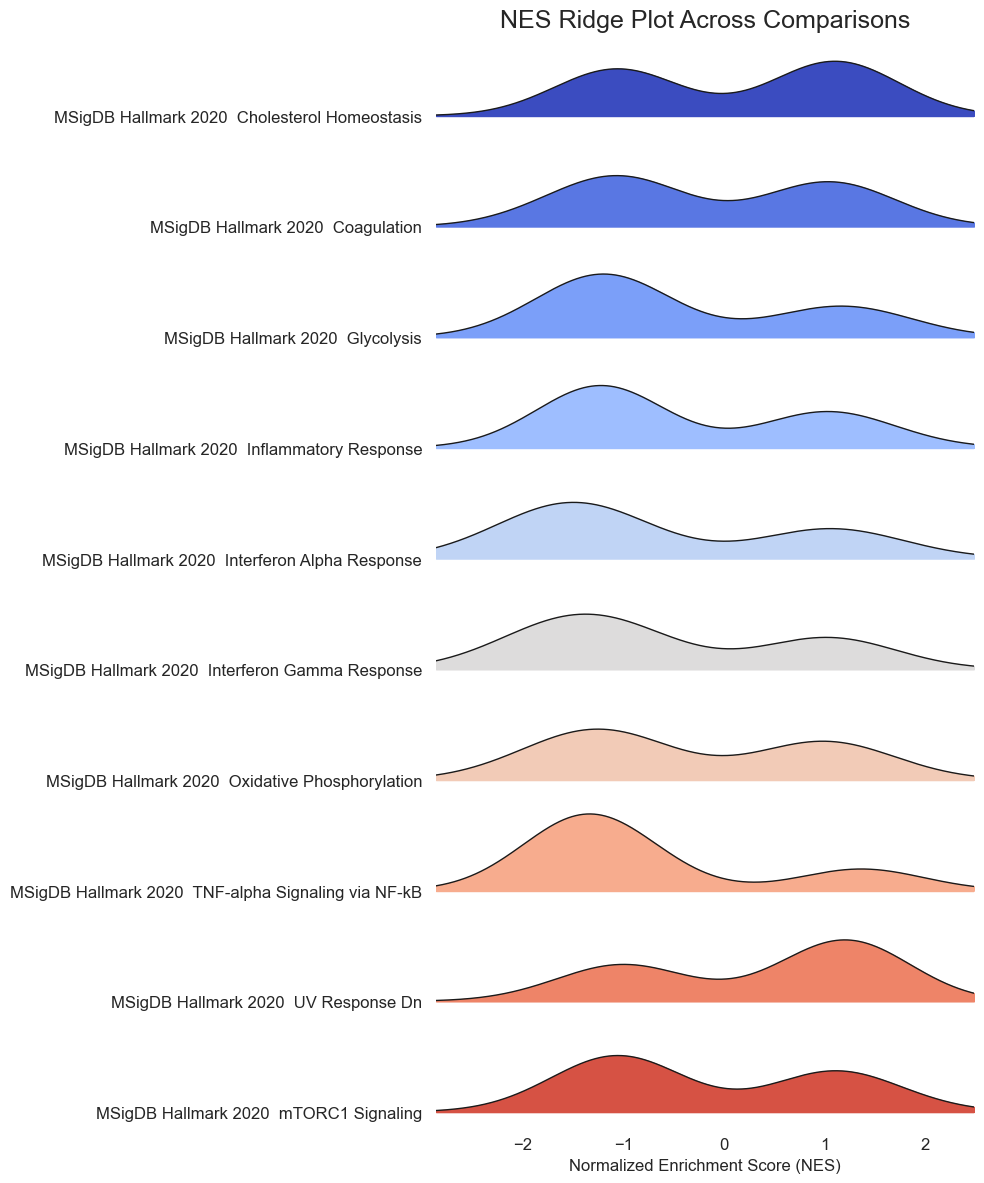

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

# ---------------------------------------------------------
# 1) STARTING DATA: your msigdb_df (1200 × 4)
# columns: comparison | pathway | NES | FDR
# ---------------------------------------------------------

print(msigdb_df.head())
print(msigdb_df.shape)

# Sanity filter: remove NA NES
df = msigdb_df.dropna(subset=["NES"]).copy()

# Optional: focus on hallmark only (should already be true)
df = df[df["pathway"].str.contains("HALLMARK", case=False, na=False)]

print("After filtering:", df.shape)

# ---------------------------------------------------------
# 2) SELECT TOP PATHWAYS TO PLOT (20 with strongest NES variation)
# ---------------------------------------------------------
# Compute variance across comparisons
path_var = df.groupby("pathway")["NES"].var().sort_values(ascending=False)

top_paths = path_var.head(20).index.tolist()
print("Top ridge pathways:", top_paths)

df_top = df[df["pathway"].isin(top_paths)]

# ---------------------------------------------------------
# 3) Ridge plot
# ---------------------------------------------------------
plt.figure(figsize=(10, 12))

joypy.joyplot(
    df_top,
    by="pathway",
    column="NES",
    figsize=(10, 12),
    colormap=plt.cm.coolwarm,
    linewidth=1,
    overlap=0.8
)

plt.title("NES Ridge Plot Across Comparisons", fontsize=18)
plt.xlabel("Normalized Enrichment Score (NES)")
plt.tight_layout()
plt.show()

Detected cell types: ['Astro_AD_vs_CTRL' 'Astro_AD_vs_PD' 'Astro_PD_vs_CTRL' 'Endo_AD_vs_CTRL'
 'Endo_AD_vs_PD' 'Endo_PD_vs_CTRL' 'EN_AD_vs_CTRL' 'EN_AD_vs_PD'
 'EN_PD_vs_CTRL' 'Immune_AD_vs_CTRL' 'Immune_AD_vs_PD' 'Immune_PD_vs_CTRL'
 'IN_AD_vs_CTRL' 'IN_AD_vs_PD' 'IN_PD_vs_CTRL' 'Mural_AD_vs_CTRL'
 'Mural_AD_vs_PD' 'Mural_PD_vs_CTRL' 'Oligo_AD_vs_CTRL' 'Oligo_AD_vs_PD'
 'Oligo_PD_vs_CTRL' 'OPC_AD_vs_CTRL' 'OPC_AD_vs_PD' 'OPC_PD_vs_CTRL']


C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


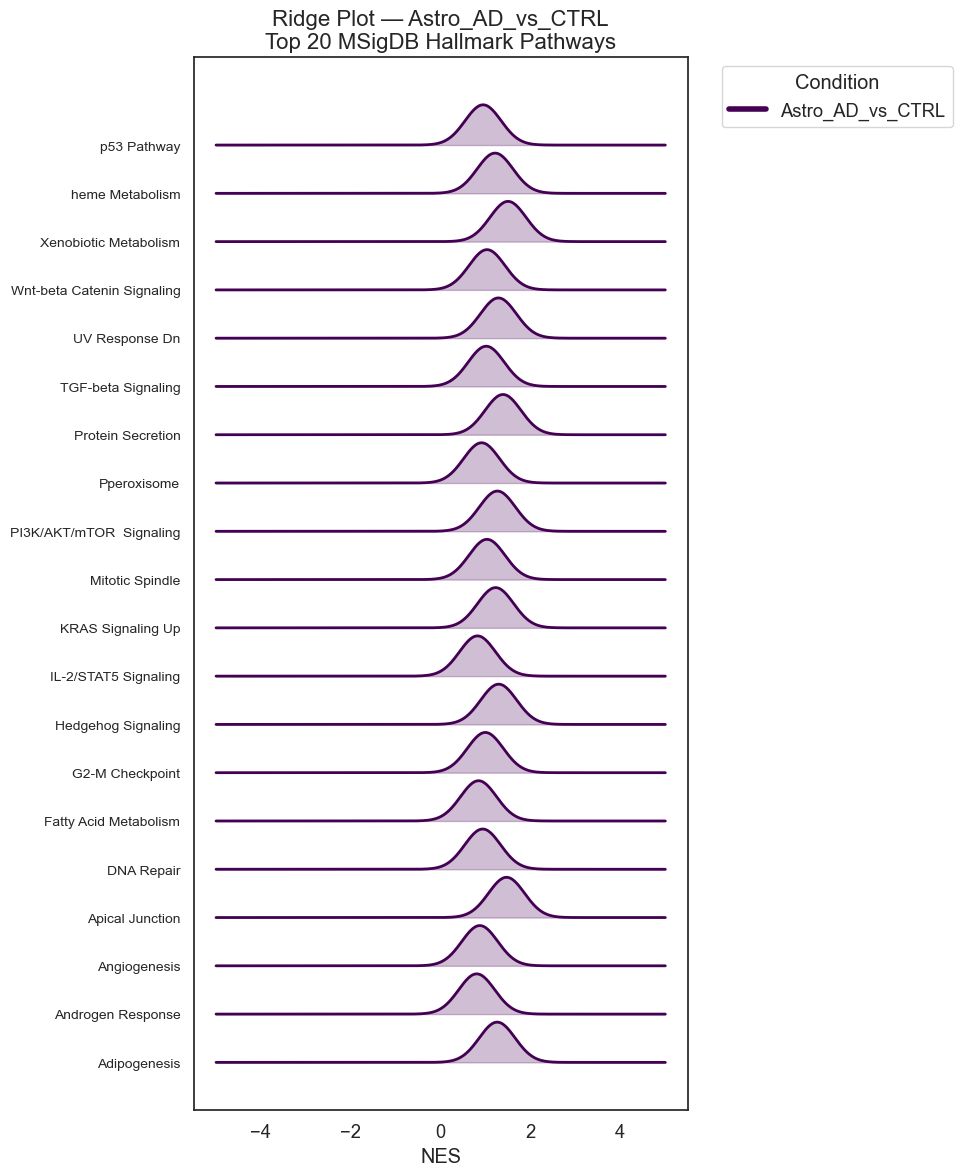

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


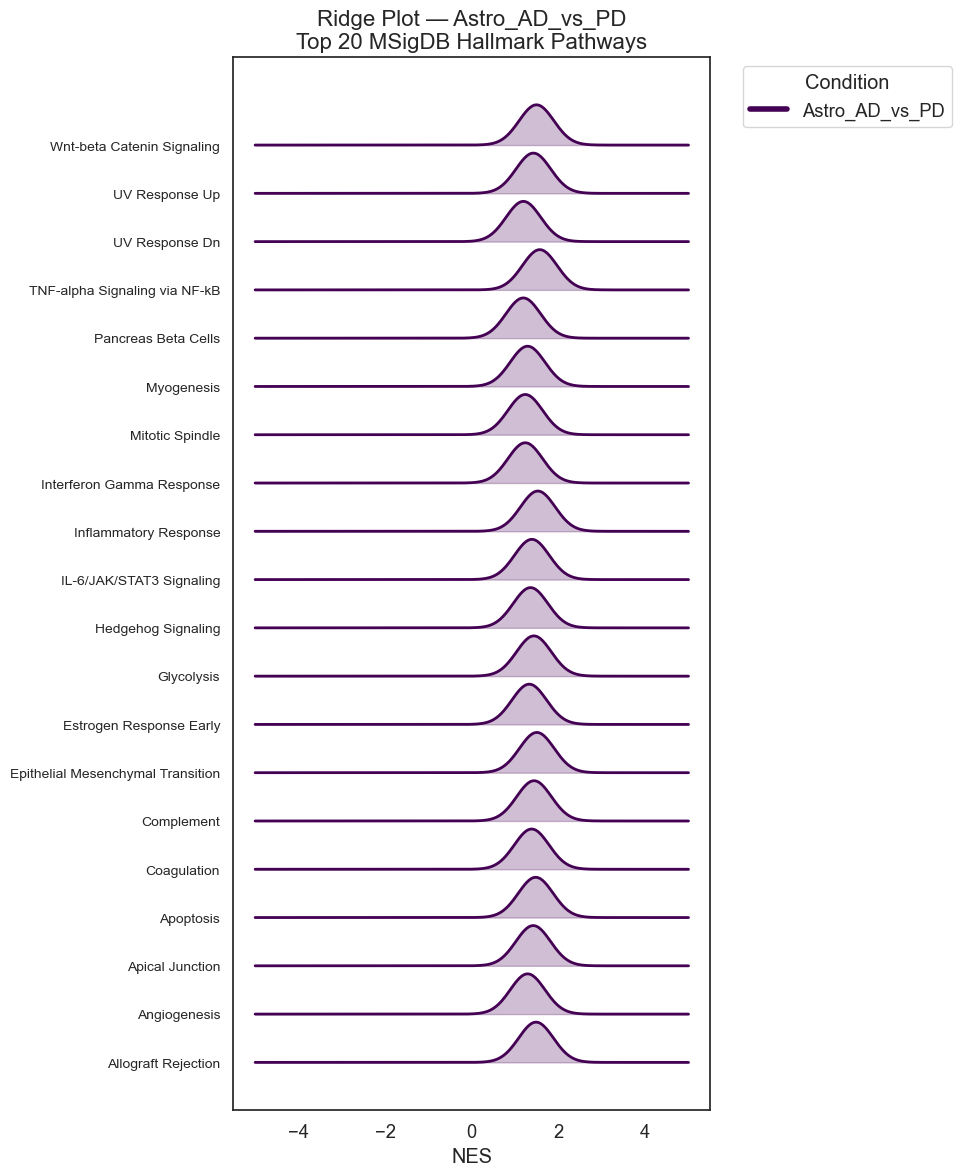

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


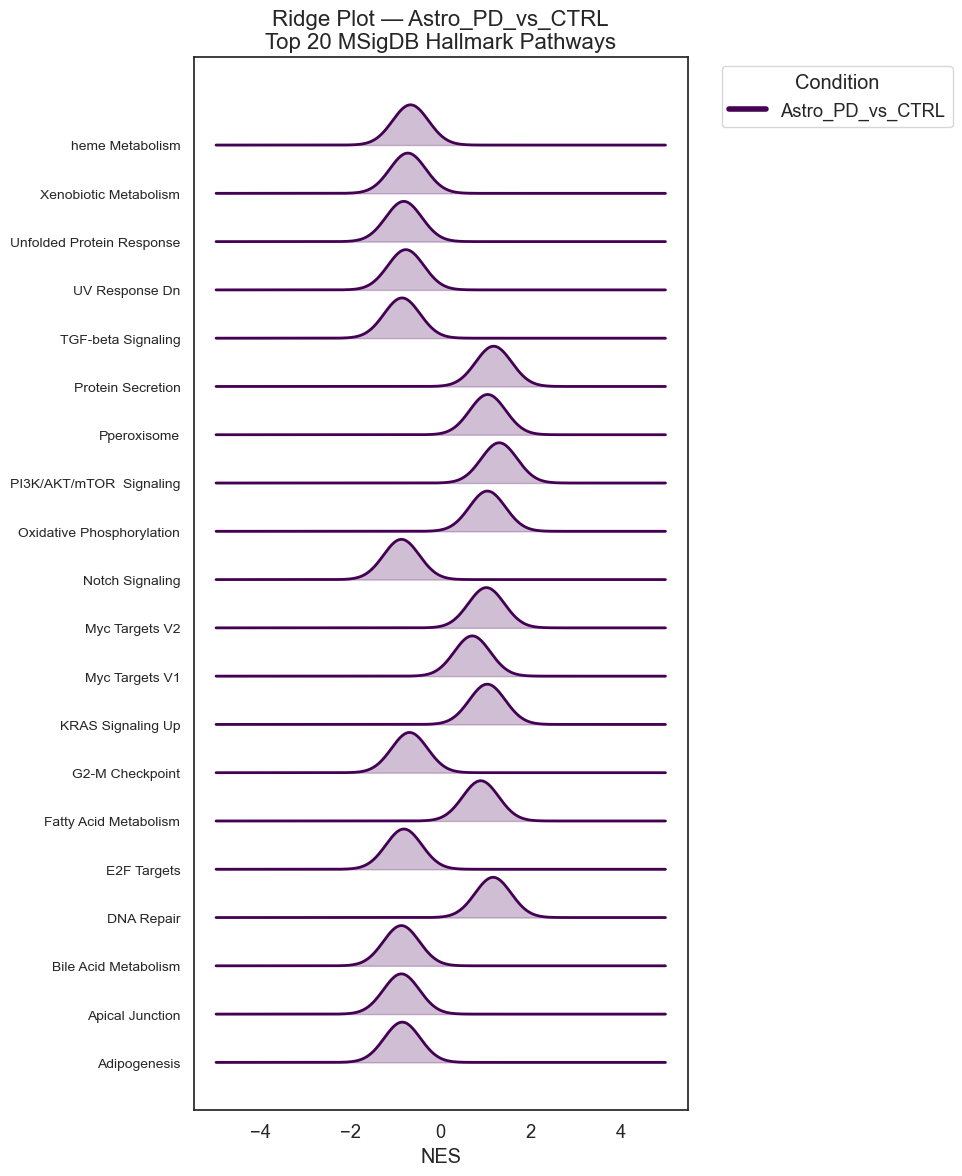

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


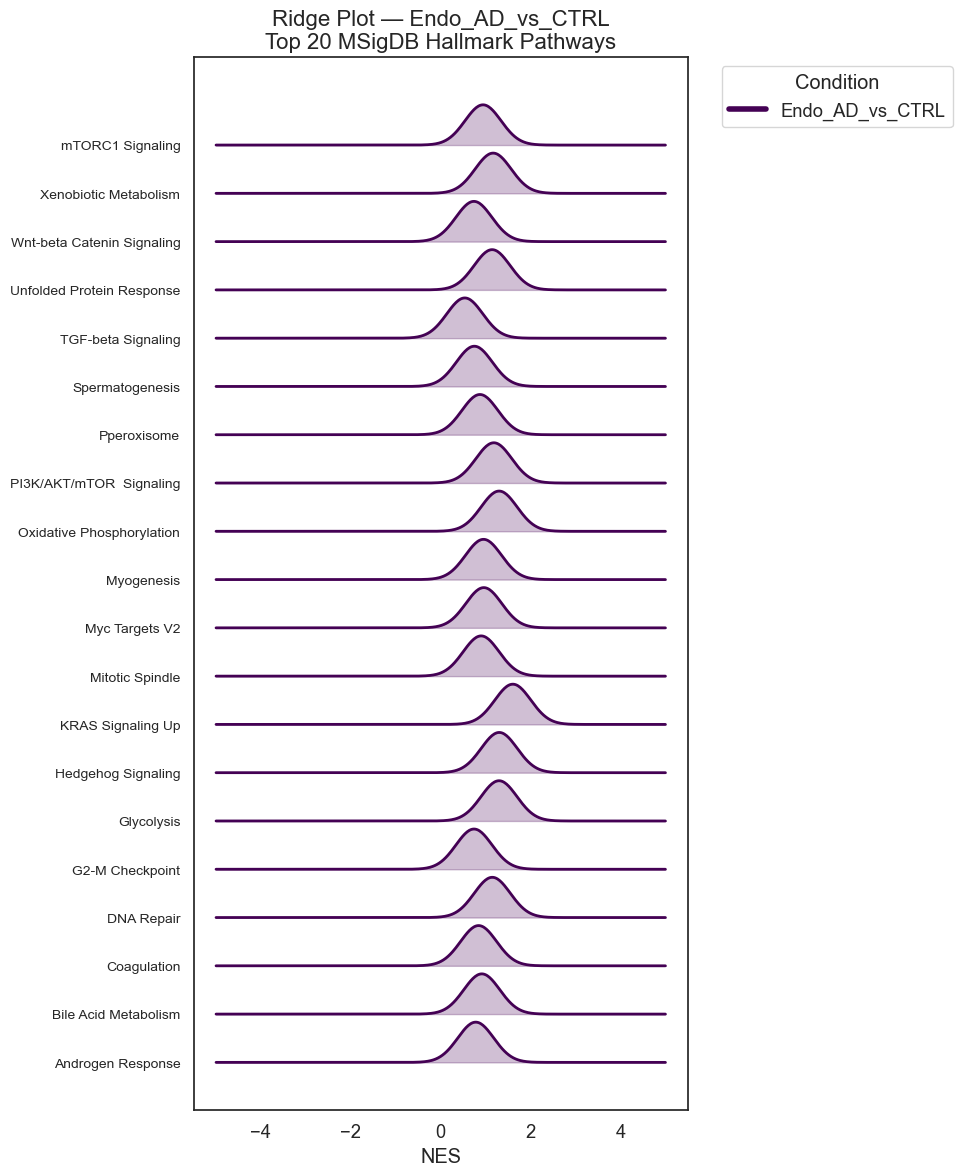

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


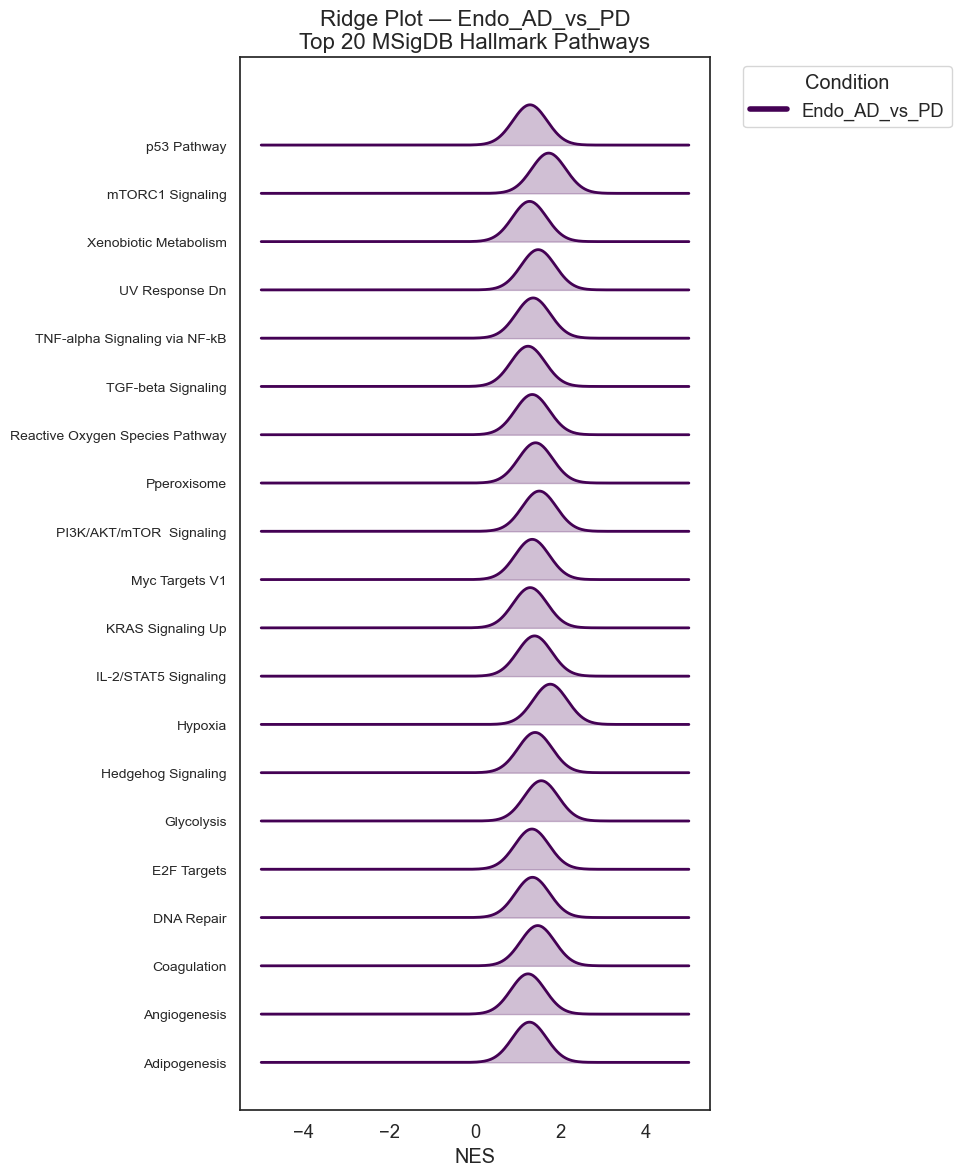

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


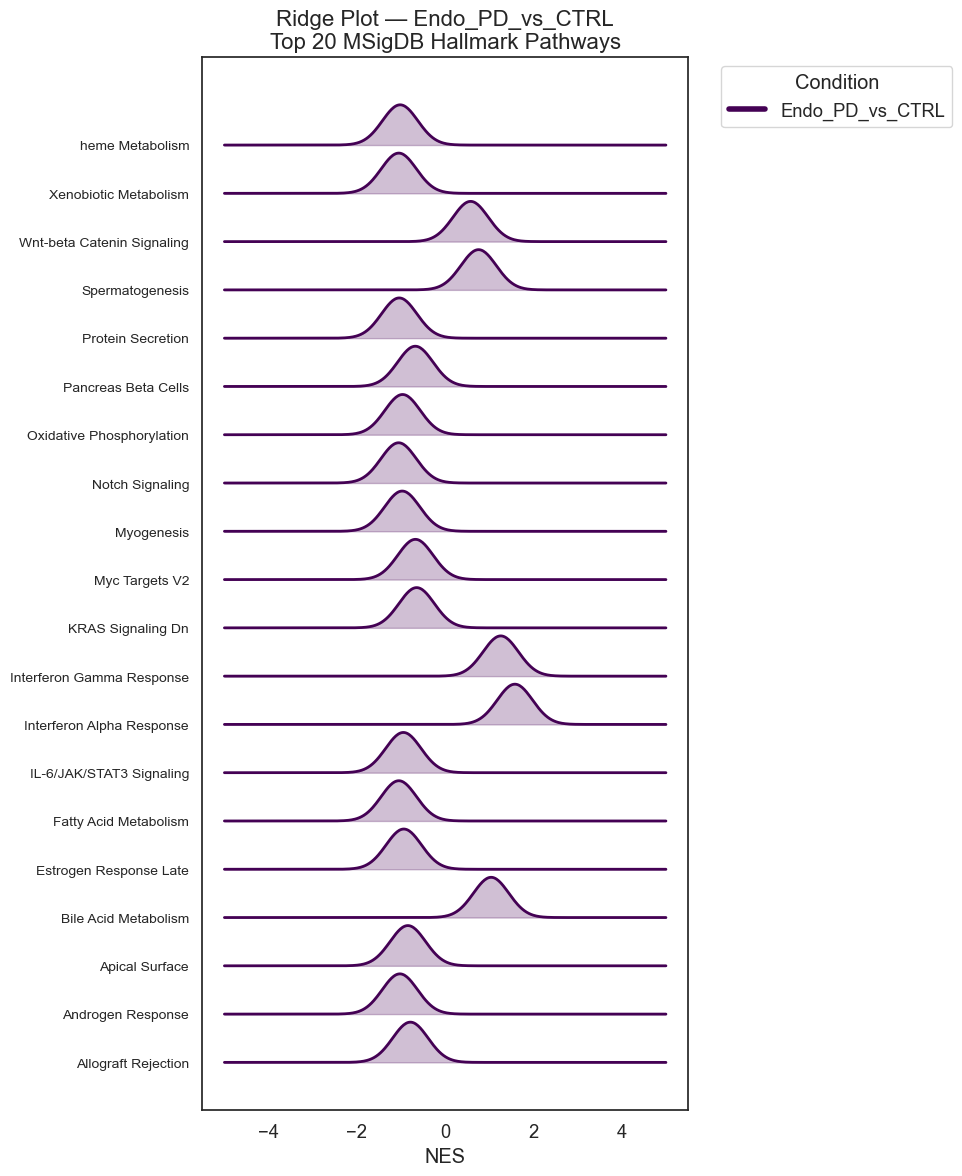

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


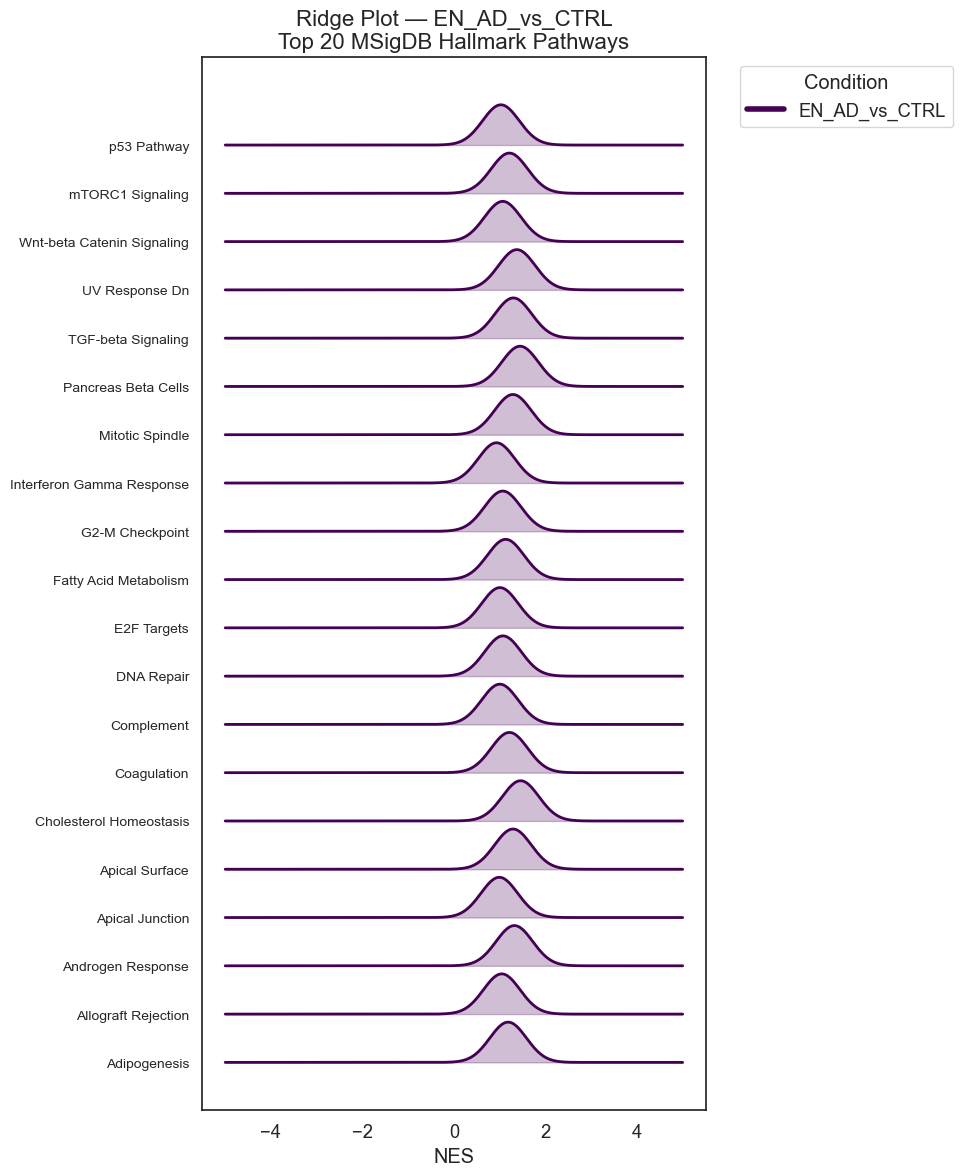

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


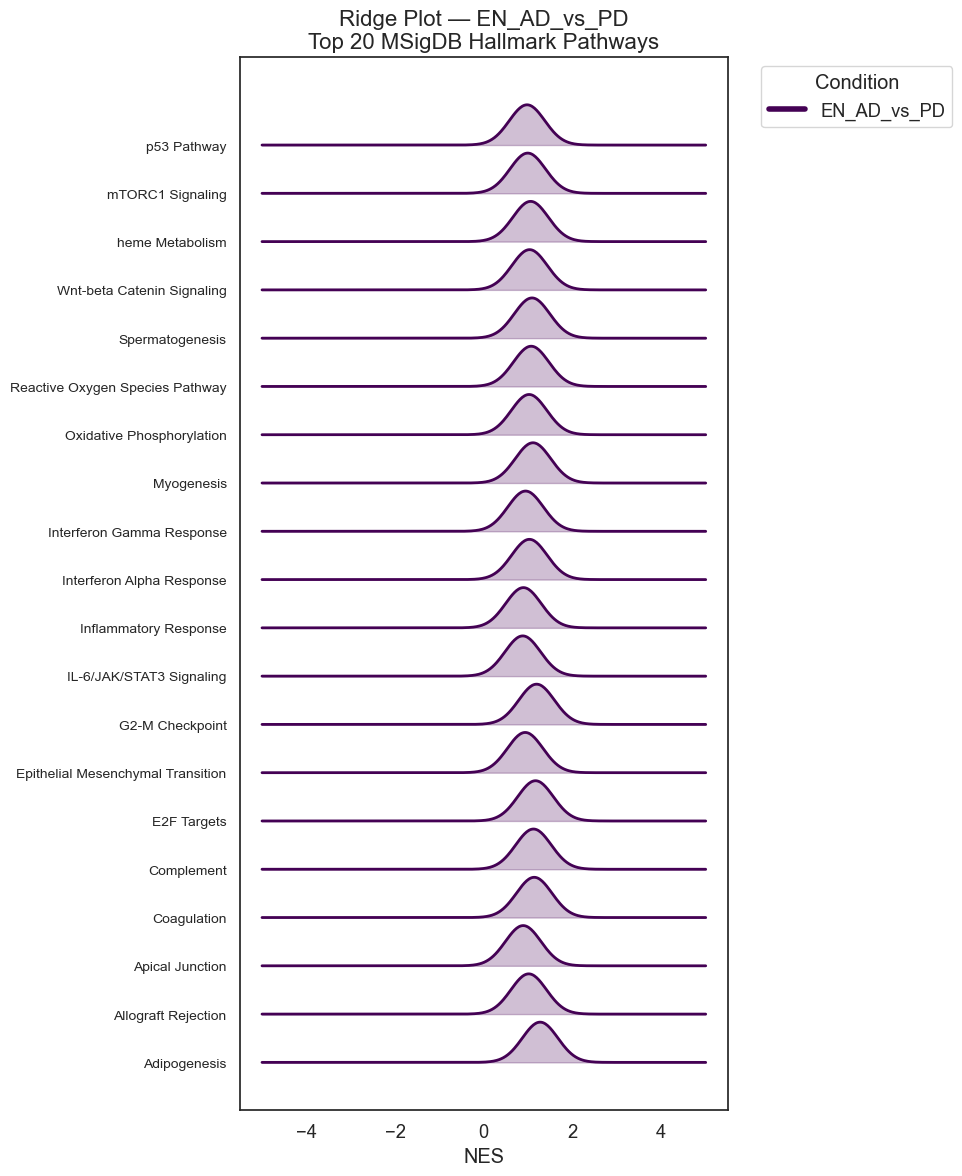

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


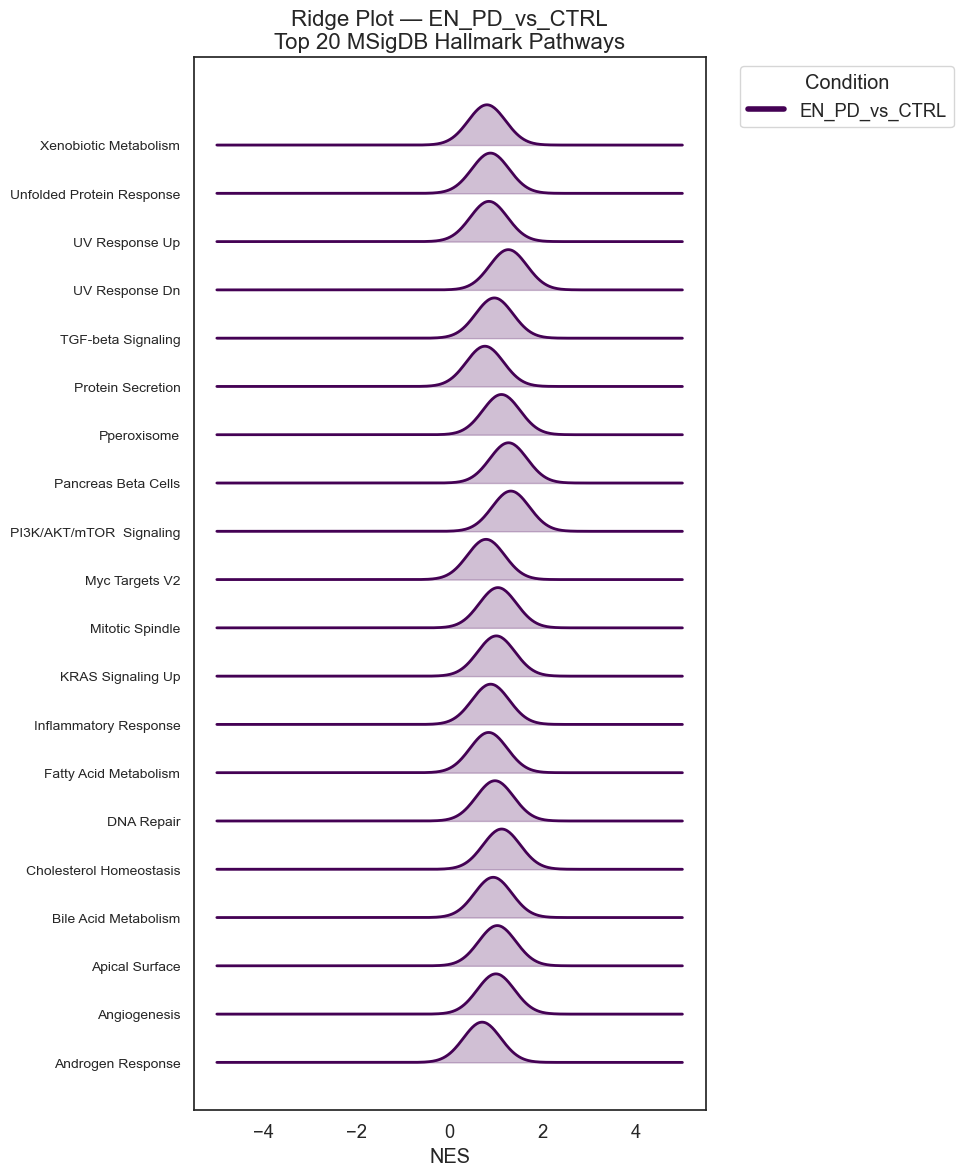

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


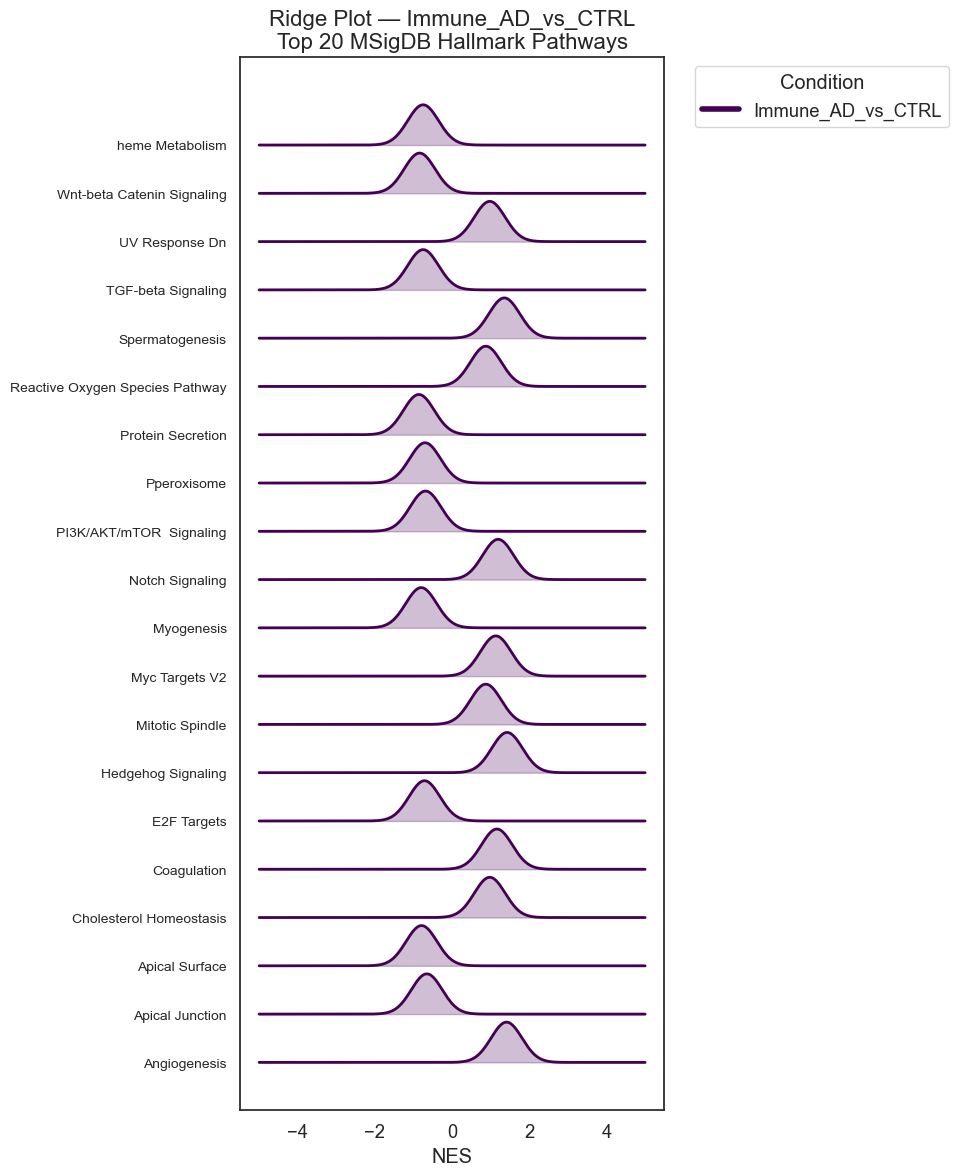

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


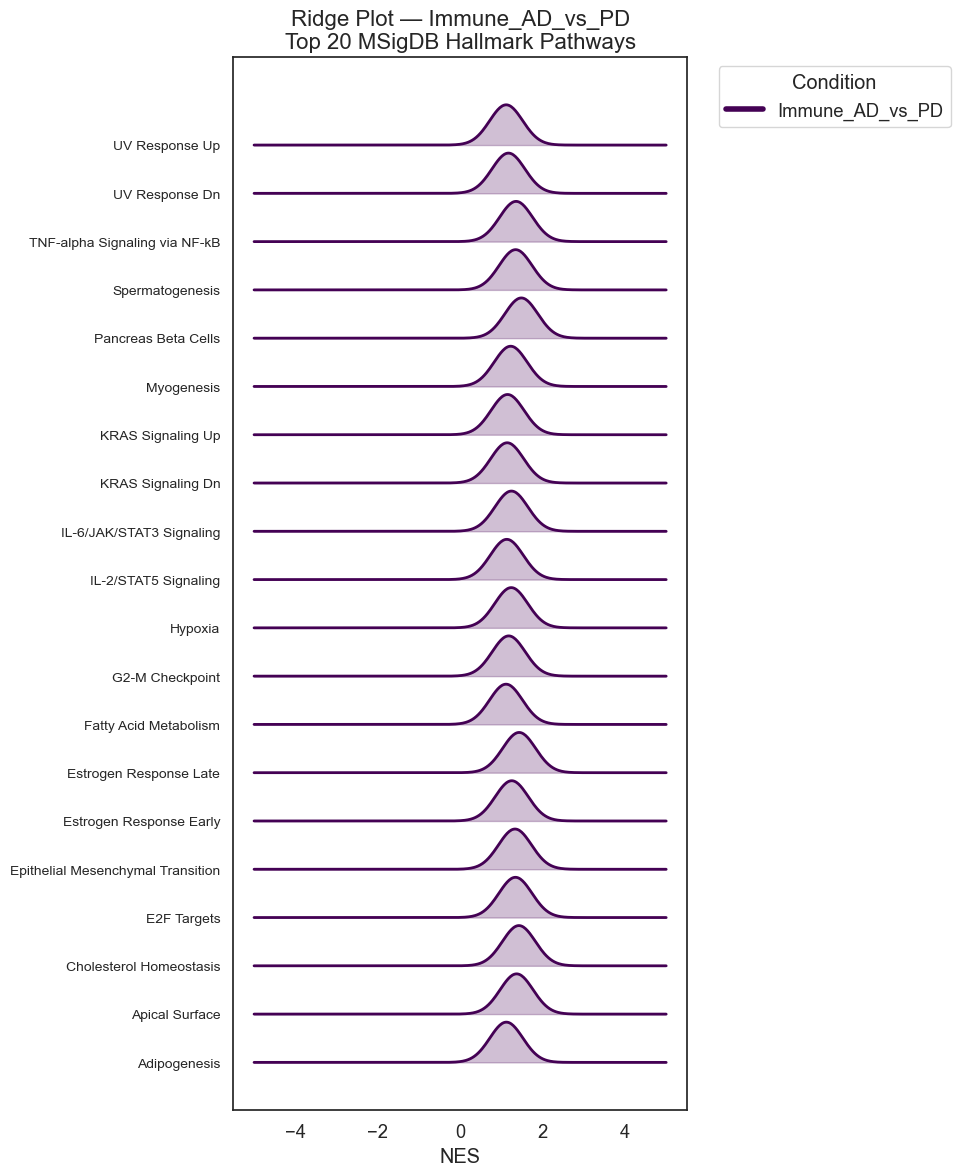

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


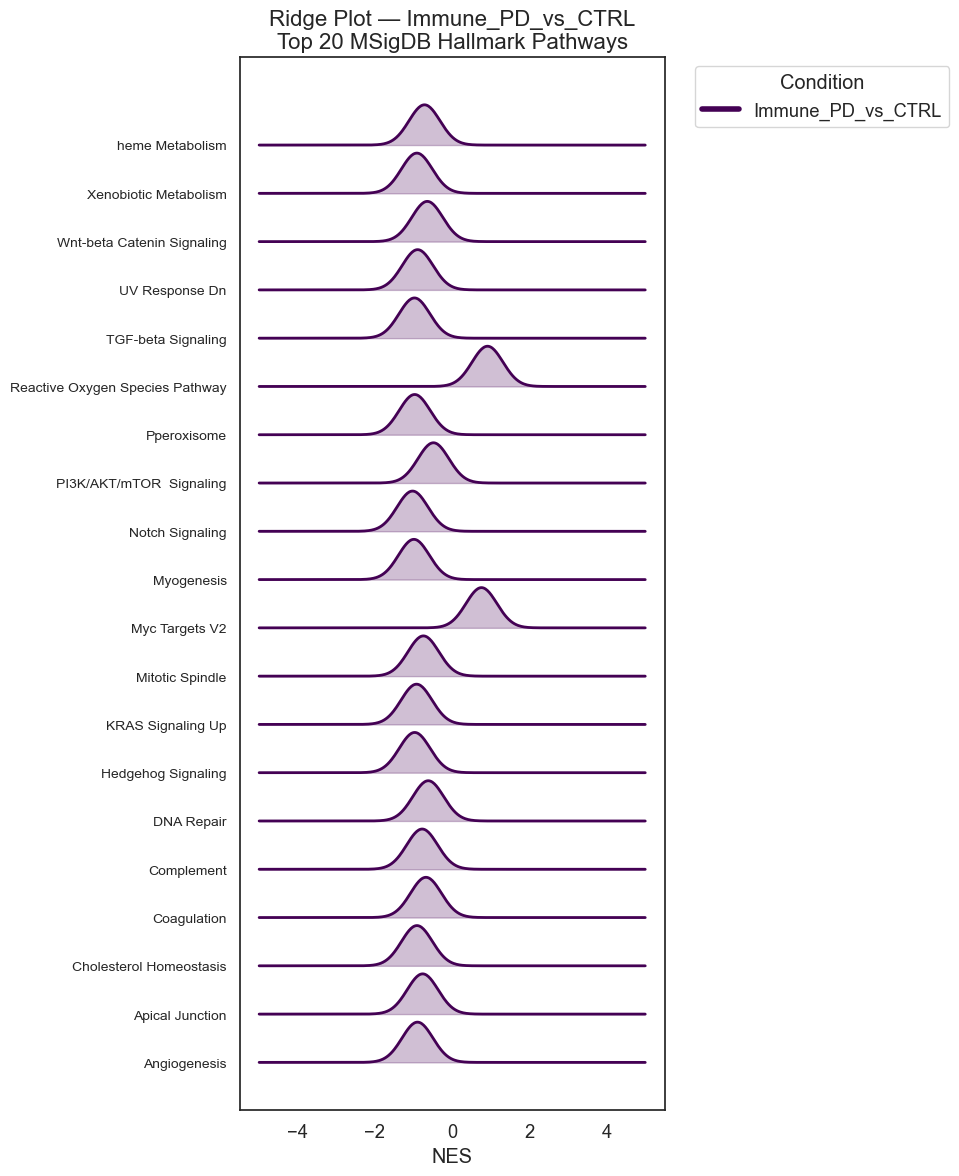

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


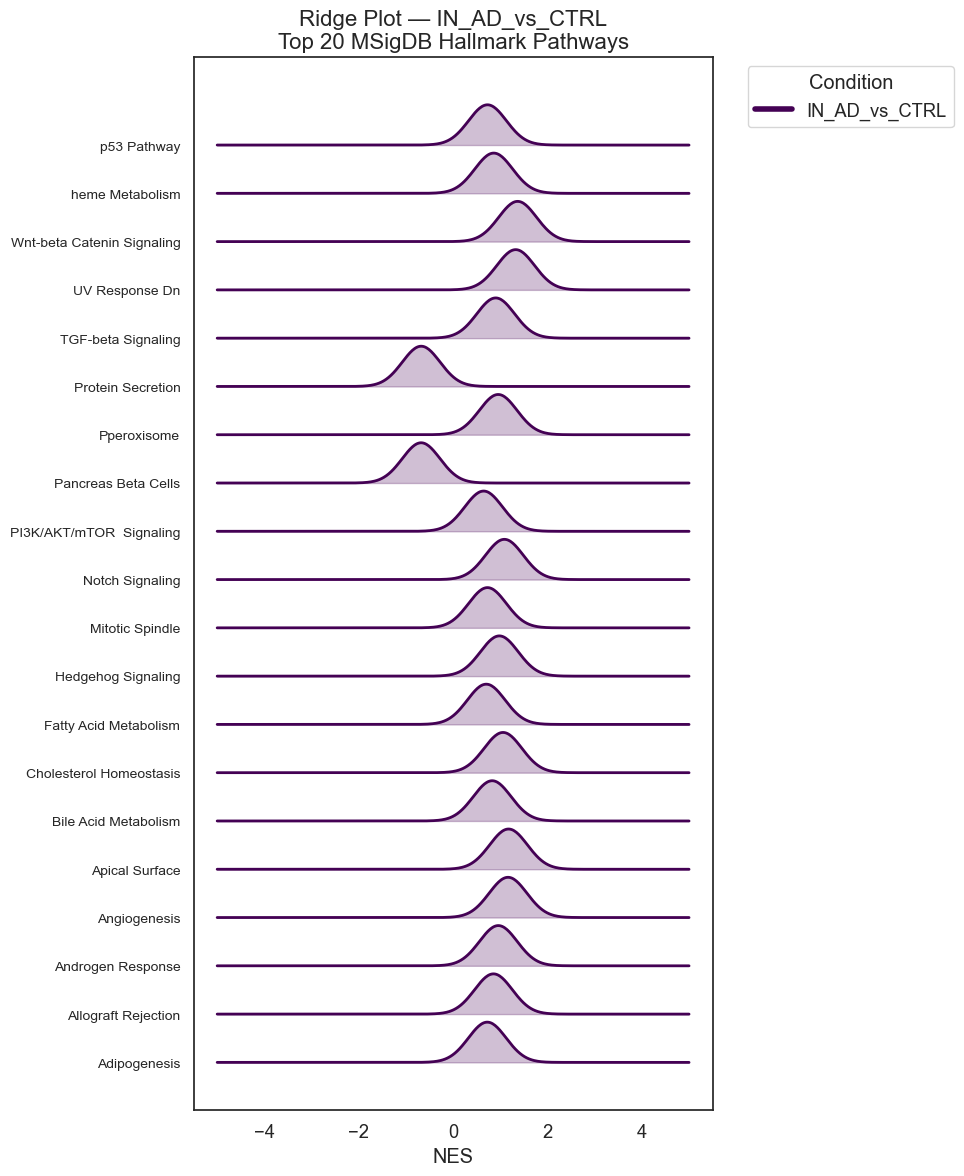

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


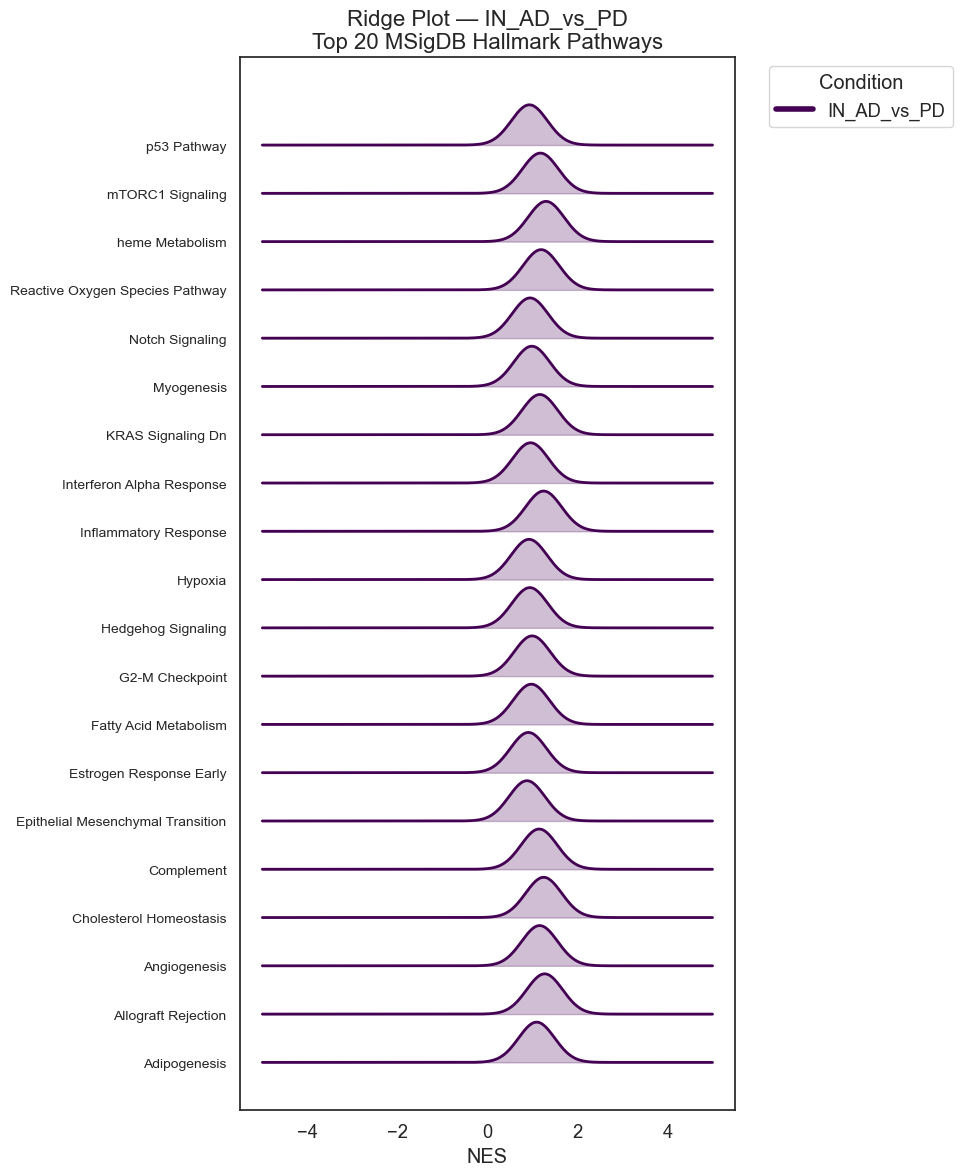

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


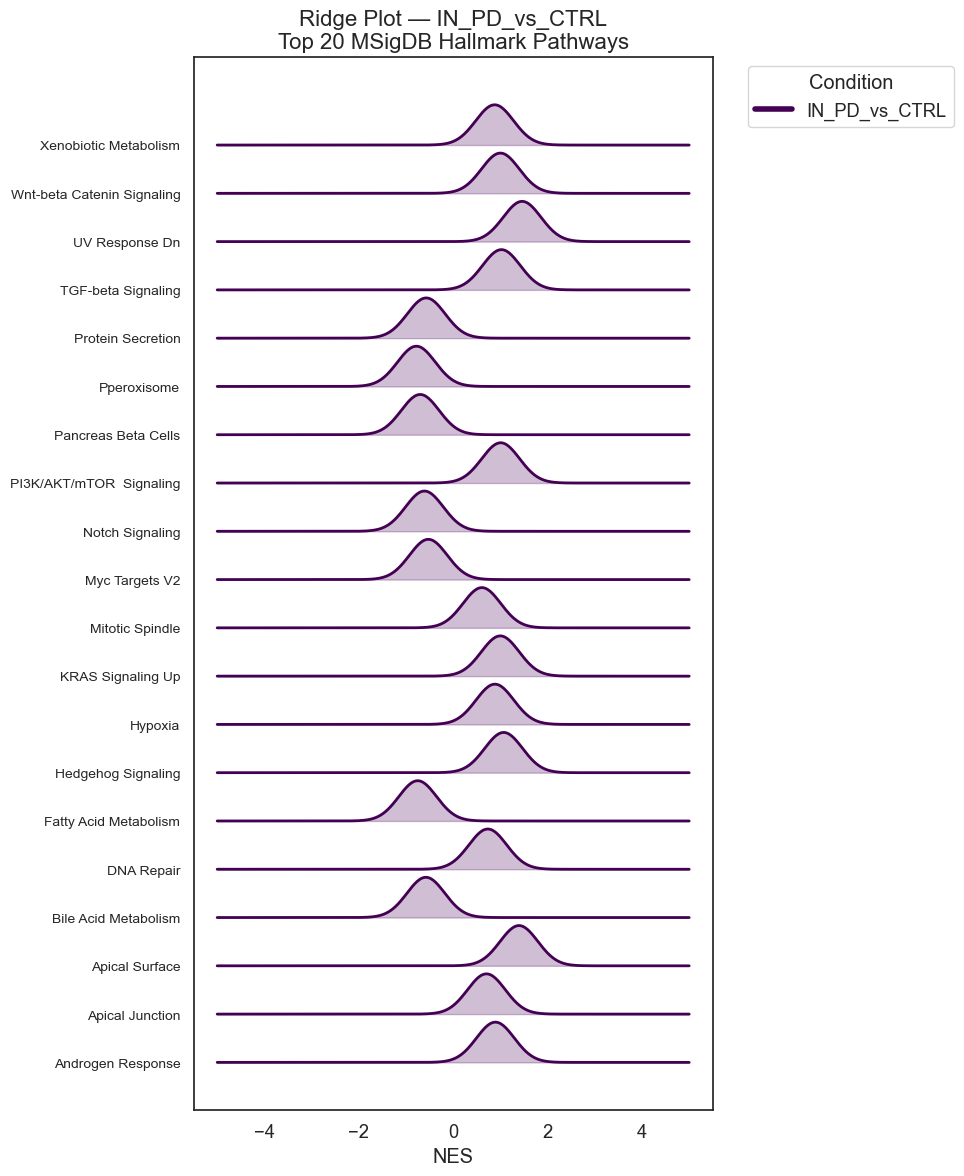

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


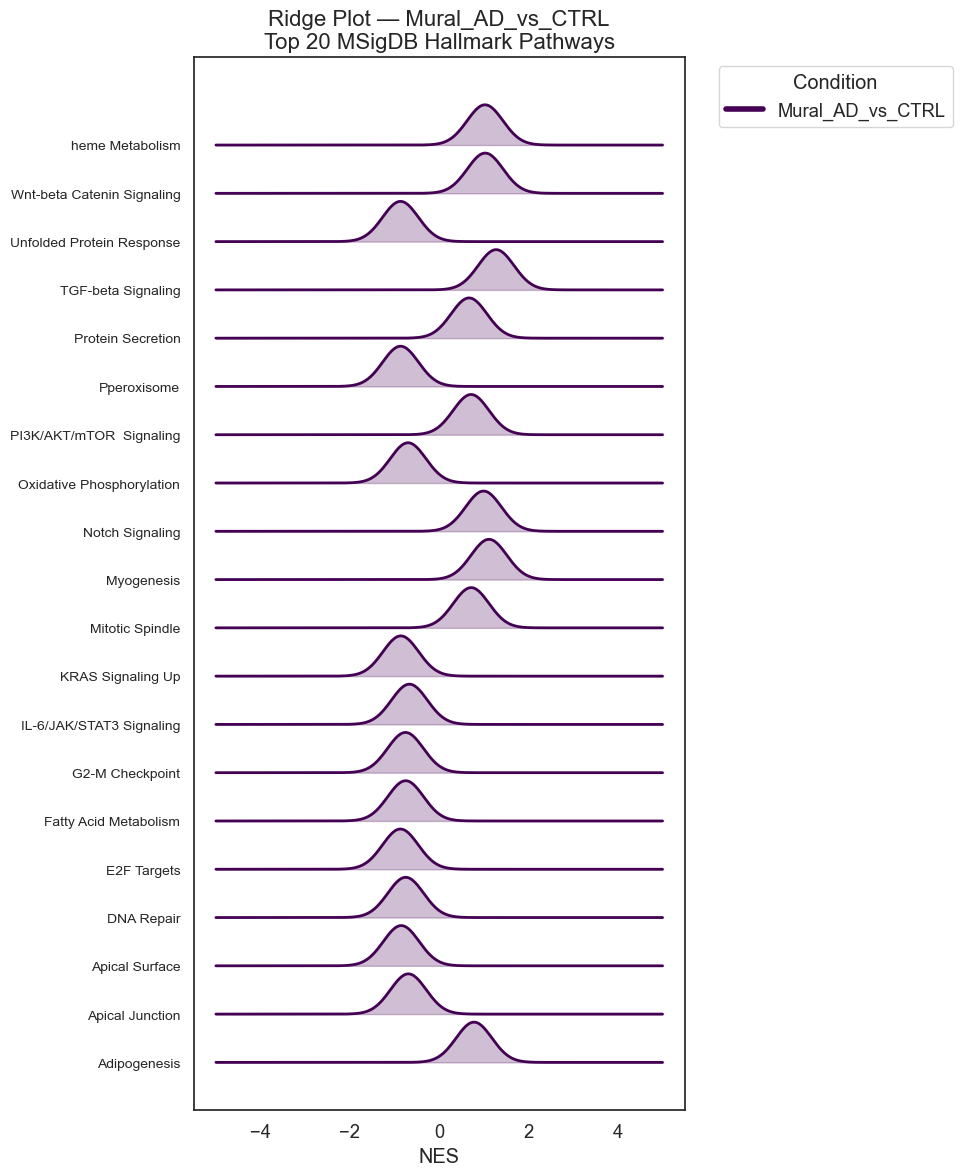

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


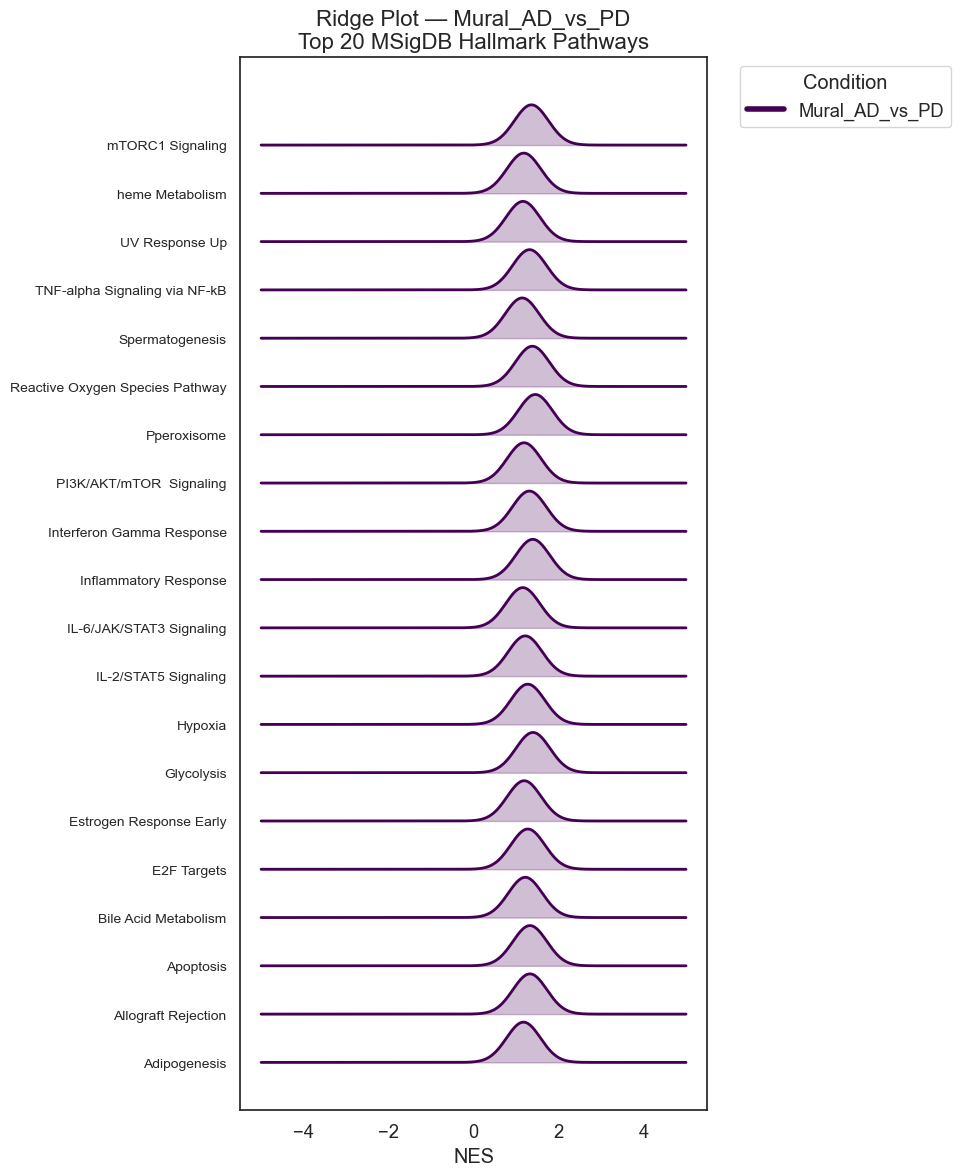

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


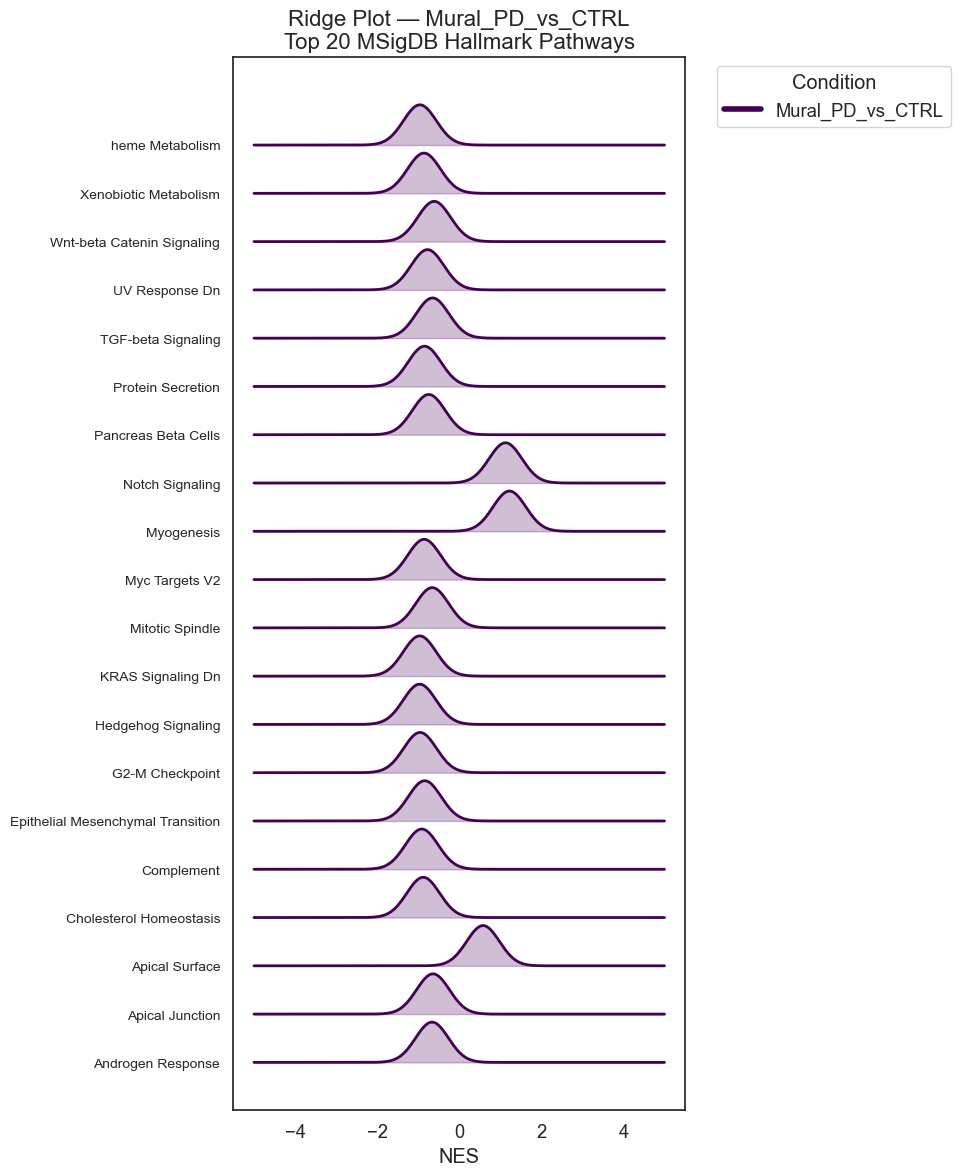

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


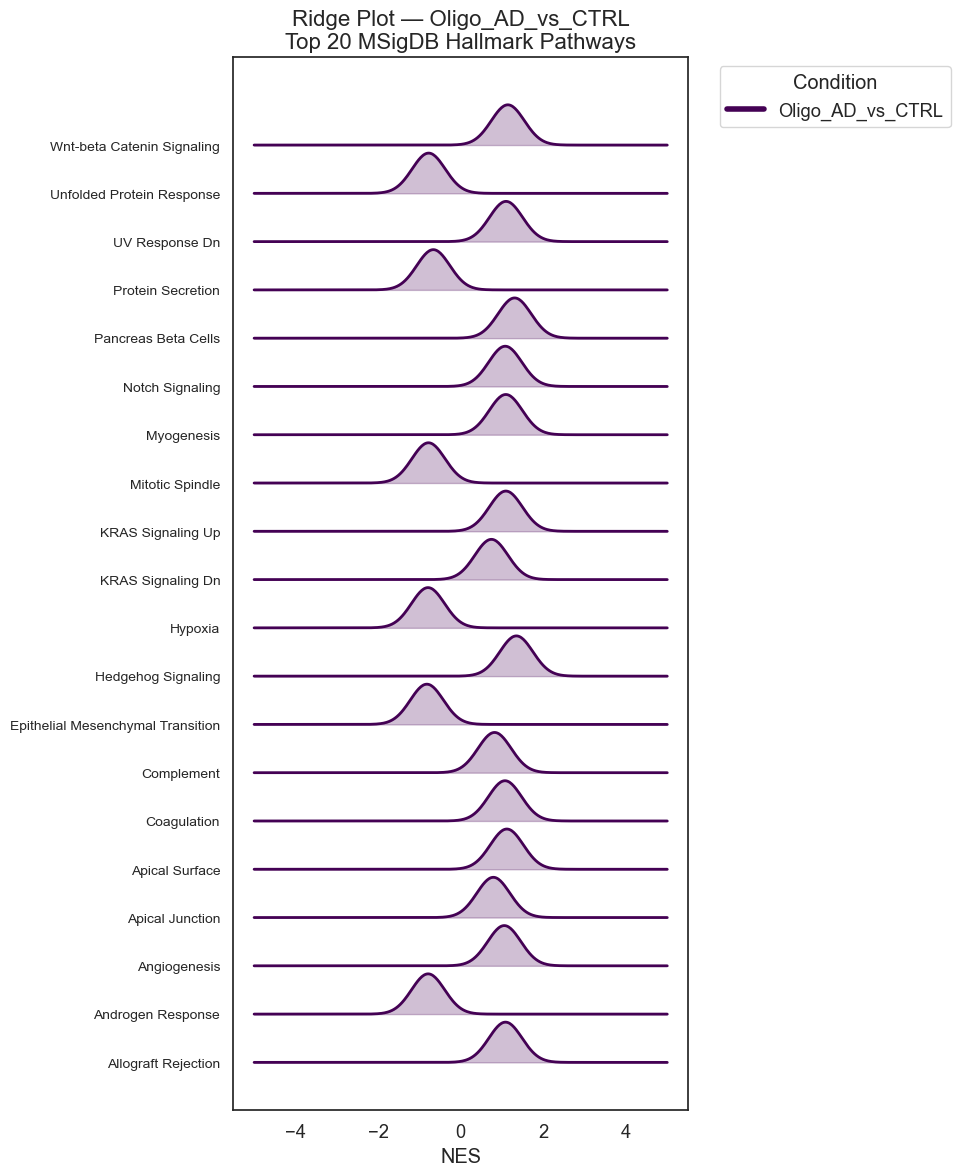

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


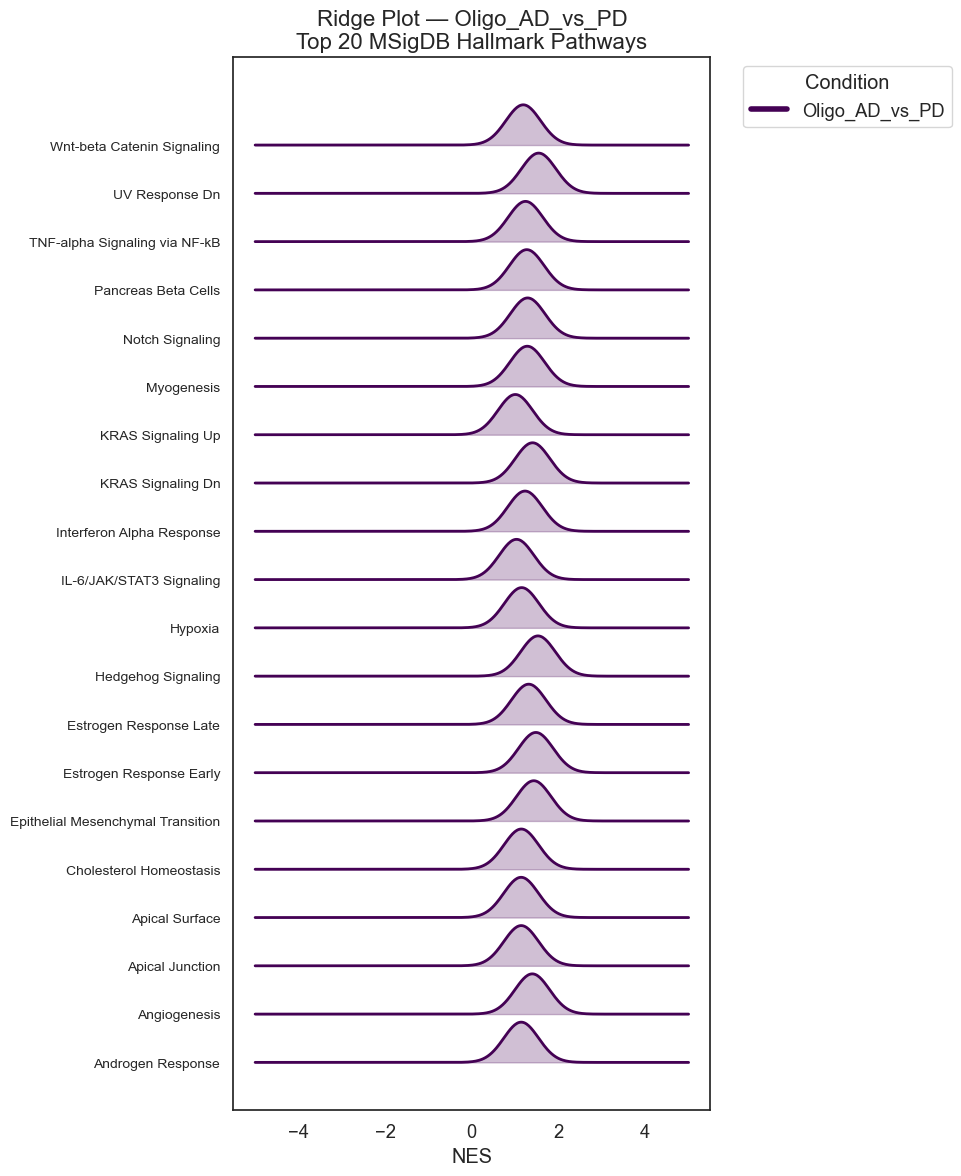

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


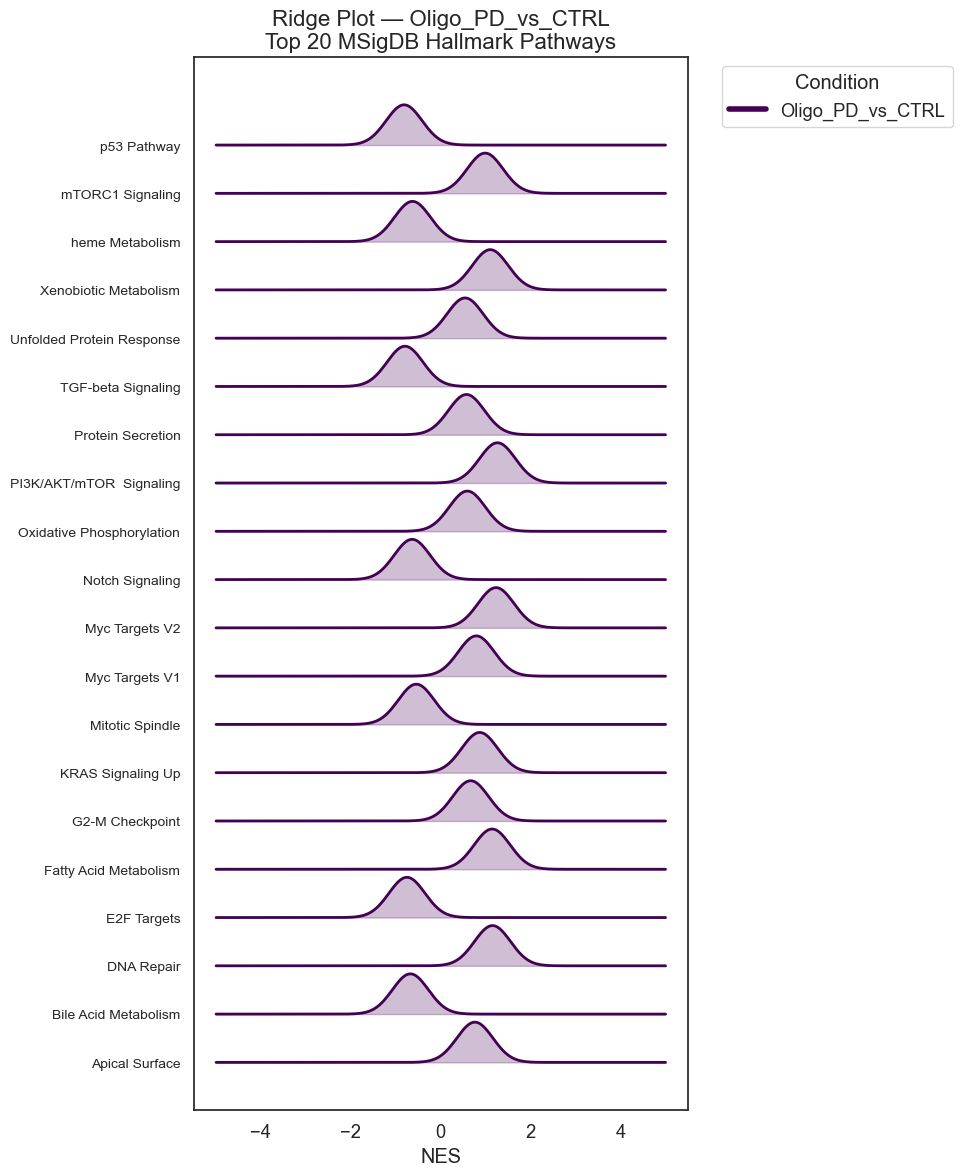

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


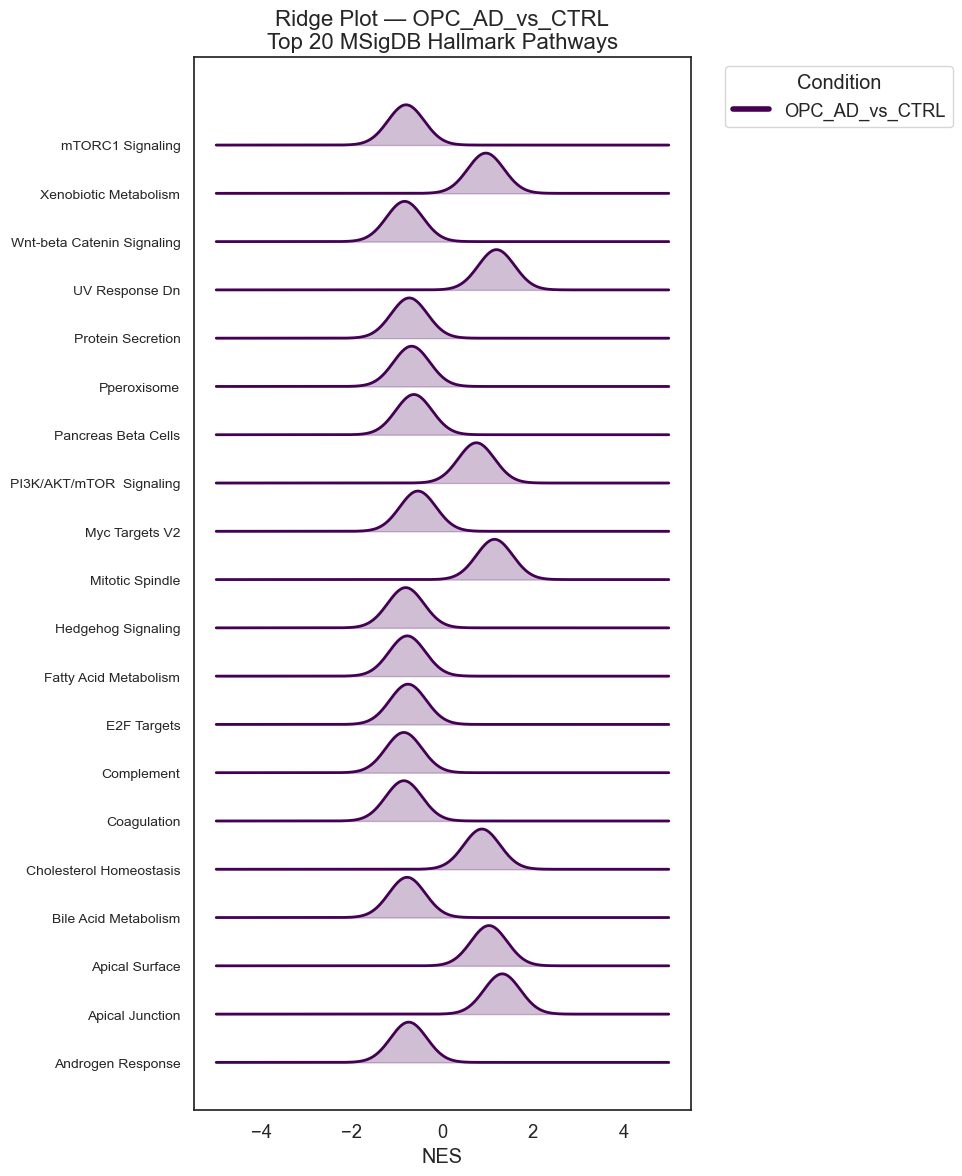

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


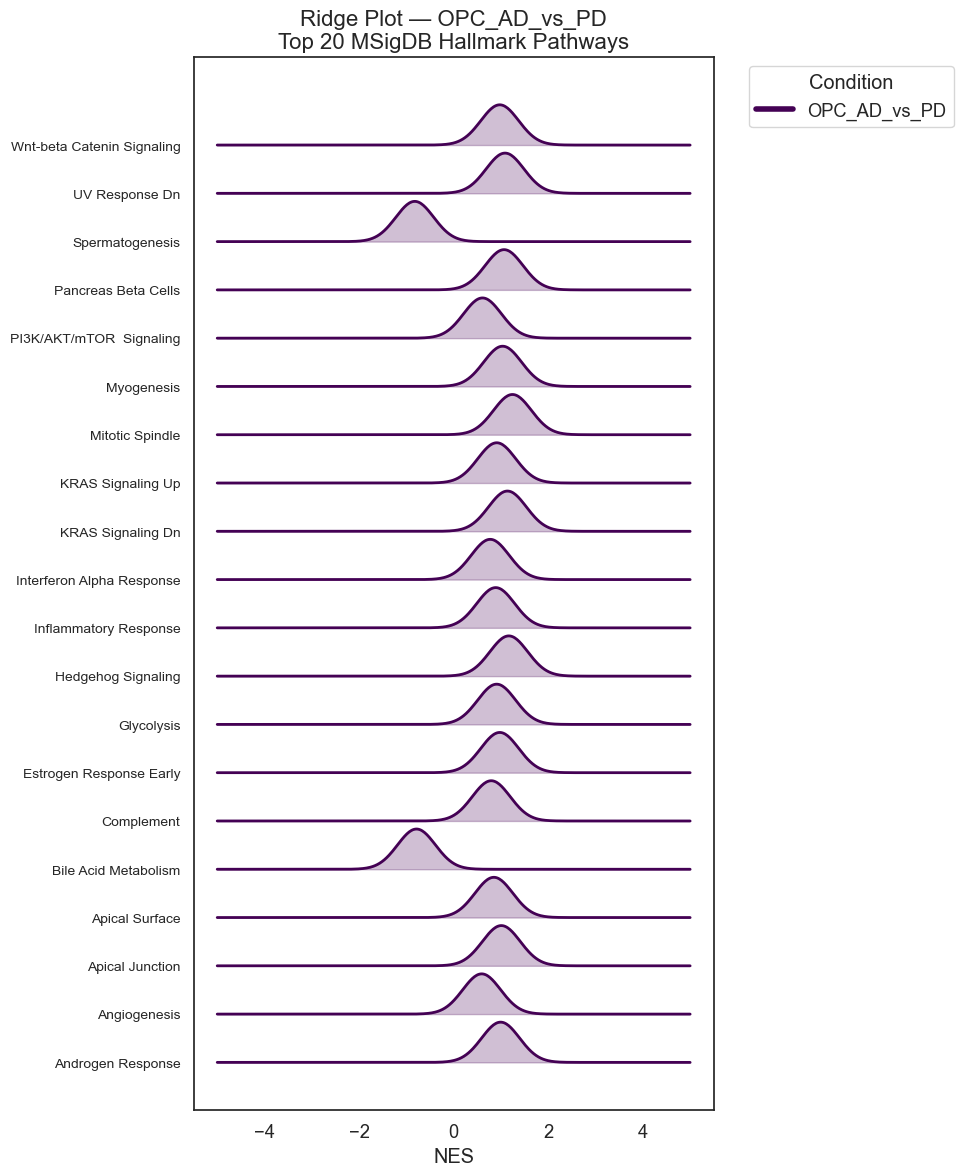

C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\2390096652.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("viridis", len(conditions))


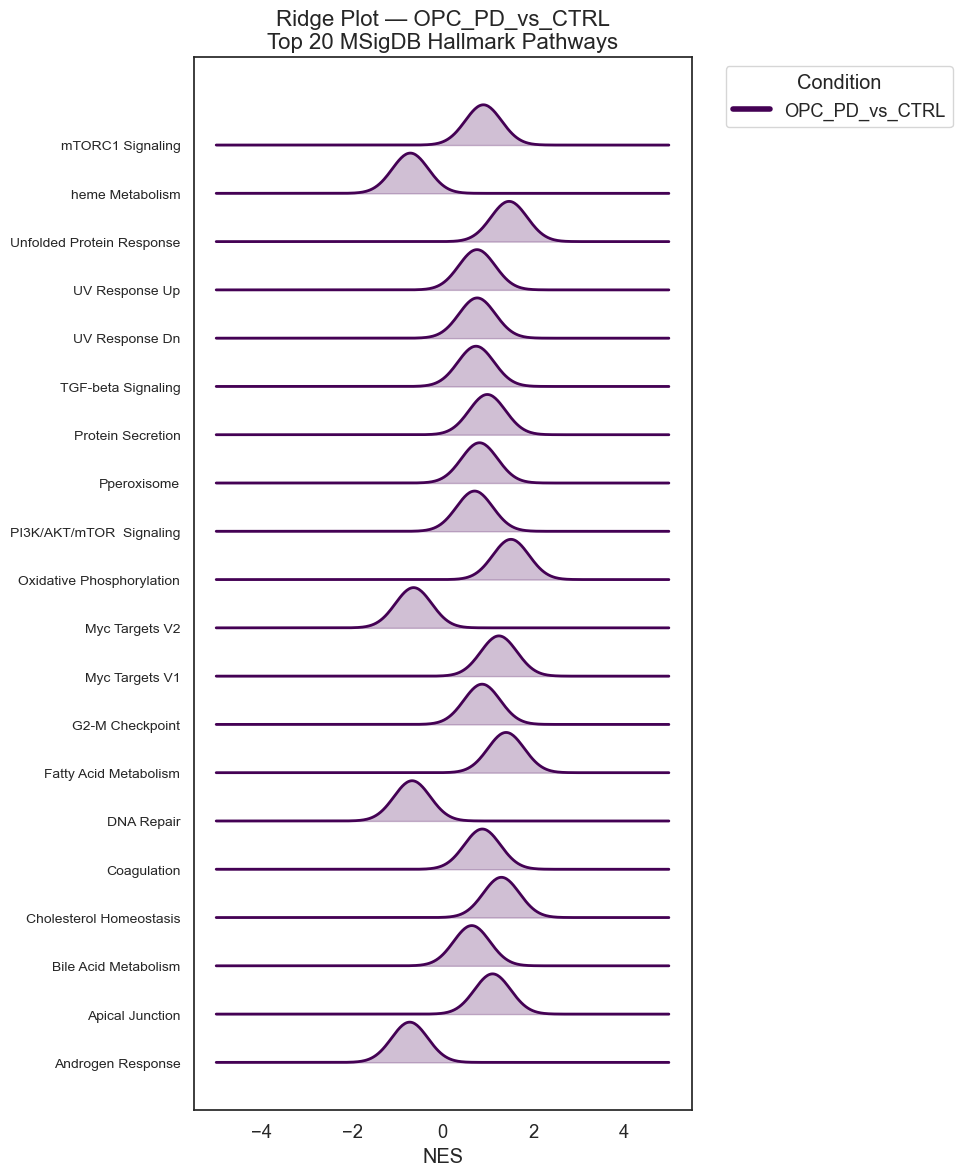

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

# --------------------------------------------------------------------
# Load the MSigDB-only table you already generated
# --------------------------------------------------------------------
msigdb_df = pd.read_csv("MSigDB_Hallmark_only_results.csv")

# Clean pathway names
msigdb_df["pathway"] = (
    msigdb_df["pathway"]
    .str.replace("MSigDB Hallmark 2020", "", regex=False)
    .str.replace("_", " ", regex=False)
    .str.strip()
)

# --------------------------------------------------------------------
# Detect cell types correctly from your exact comparison labels
# Example: "Astro AD vs CTRL"
# --------------------------------------------------------------------
def extract_celltype(comp):
    """Extracts the first word before the space as the cell type."""
    return comp.split()[0]  # Astro, Endo, EN, Immune, IN, Mural, Oligo, OPC

msigdb_df["celltype"] = msigdb_df["comparison"].apply(extract_celltype)

# Confirm the mapping works
print("Detected cell types:", msigdb_df["celltype"].unique())

# --------------------------------------------------------------------
# Generate ridge plots per cell type
# --------------------------------------------------------------------
celltypes = msigdb_df["celltype"].unique()

for ct in celltypes:
    df_ct = msigdb_df[msigdb_df["celltype"] == ct].copy()

    if df_ct.empty:
        print(f"⚠ No MSigDB pathways found for {ct}")
        continue

    # --------------------------
    # Select top 20 enriched pathways for this cell type
    # --------------------------
    df_ct_sorted = df_ct.sort_values("NES", ascending=False)
    top_paths = df_ct_sorted["pathway"].unique()[:20]

    df_plot = df_ct[df_ct["pathway"].isin(top_paths)].copy()

    # --------------------------
    # Assign a Y position to each pathway
    # --------------------------
    df_plot["path_id"] = df_plot["pathway"].astype("category").cat.codes
    df_plot["ypos"] = df_plot["path_id"] * 1.2  # vertical spacing

    # --------------------------
    # Ridge Plot
    # --------------------------
    plt.figure(figsize=(10, 12))
    conditions = sorted(df_plot["comparison"].unique())

    # Color palette
    palette = cm.get_cmap("viridis", len(conditions))

    for i, cond in enumerate(conditions):
        subset = df_plot[df_plot["comparison"] == cond]

        if subset.empty:
            continue

        for _, row in subset.iterrows():
            y = row["ypos"]
            x = np.linspace(-5, 5, 400)
            curve = np.exp(-(x - row["NES"])**2 / (2 * 0.4**2))

            plt.plot(x, curve + y, color=palette(i), lw=2)
            plt.fill_between(x, y, curve + y, alpha=0.25, color=palette(i))

    # Y‑axis labels (pathways)
    y_labels = (
        df_plot[["pathway", "ypos"]]
        .drop_duplicates()
        .sort_values("ypos")
    )
    plt.yticks(y_labels["ypos"], y_labels["pathway"], fontsize=10)

    plt.xlabel("NES")
    plt.title(f"Ridge Plot — {ct}\nTop 20 MSigDB Hallmark Pathways", fontsize=16)

    handles = [
        plt.Line2D([0], [0], color=palette(i), lw=4, label=cond)
        for i, cond in enumerate(conditions)
    ]
    plt.legend(handles=handles, title="Condition", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()


In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# if msigdb_df is already in memory, just add this:
msigdb_df["cell_type"] = msigdb_df["comparison"].str.split("_").str[0]

print(msigdb_df[["comparison", "cell_type"]].drop_duplicates().head())


           comparison cell_type
0    Astro_AD_vs_CTRL     Astro
50     Astro_AD_vs_PD     Astro
100  Astro_PD_vs_CTRL     Astro
150   Endo_AD_vs_CTRL      Endo
200     Endo_AD_vs_PD      Endo


In [35]:
os.makedirs("ridgeplots", exist_ok=True)

def plot_cell_type_nes(cell, df, top_n=20):
    df_ct = df[df["cell_type"] == cell].copy()
    if df_ct.empty:
        print(f"No rows for cell type {cell}")
        return

    # pick top pathways for this cell type by best (min) FDR across conditions
    top_paths = (
        df_ct.groupby("pathway")["FDR"]
             .min()
             .sort_values()
             .head(top_n)
             .index
    )

    df_top = df_ct[df_ct["pathway"].isin(top_paths)].copy()

    # order pathways by mean NES (for nicer y‑axis)
    path_order = (
        df_top.groupby("pathway")["NES"]
              .mean()
              .sort_values()
              .index
    )

    plt.figure(figsize=(10, 0.45 * len(path_order) + 2))

    sns.pointplot(
        data=df_top,
        y="pathway",
        x="NES",
        hue="comparison",
        order=path_order,
        dodge=0.4,
        join=False
    )

    plt.axvline(0, color="grey", linestyle="--", linewidth=1)
    plt.title(f"{cell} – MSigDB Hallmark NES (top {top_n} pathways)", fontsize=14)
    plt.xlabel("NES")
    plt.ylabel("Pathway")
    plt.tight_layout()

    out = f"ridgeplots/{cell}_NES_multicondition.png"
    plt.savefig(out, dpi=300)
    plt.close()
    print("Saved:", out)


In [36]:
for cell in sorted(msigdb_df["cell_type"].unique()):
    plot_cell_type_nes(cell, msigdb_df, top_n=20)


C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\3330955542.py:30: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


Saved: ridgeplots/Astro_NES_multicondition.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\3330955542.py:30: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


Saved: ridgeplots/EN_NES_multicondition.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\3330955542.py:30: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


Saved: ridgeplots/Endo_NES_multicondition.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\3330955542.py:30: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


Saved: ridgeplots/IN_NES_multicondition.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\3330955542.py:30: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


Saved: ridgeplots/Immune_NES_multicondition.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\3330955542.py:30: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


Saved: ridgeplots/Mural_NES_multicondition.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\3330955542.py:30: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


Saved: ridgeplots/OPC_NES_multicondition.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_20640\3330955542.py:30: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


Saved: ridgeplots/Oligo_NES_multicondition.png
